In [1]:
import pandas as pd

from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler

# from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#mount google drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/"

combinedDf = pd.read_csv(path + 'Combined.csv')

<ipython-input-3-17aea7ac84aa>:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  combinedDf = pd.read_csv(path + 'Combined.csv')


In [ ]:
# Info of the data
combinedDf.info()

In [6]:
# Number of rows
combinedDf.shape[0]

object_columns =  combinedDf.select_dtypes(include=[object]).columns
float_columns = combinedDf.select_dtypes(include=[float]).columns
int_columns = combinedDf.select_dtypes(include=[int]).columns

In [7]:
columns_null = []
columns = combinedDf.columns
for column in columns:
    c = combinedDf[column].isnull().sum()
    if c != 0:
        print(column, 'null values:{}'.format(c))
        columns_null.append(column)

sTos null values:214
dTos null values:943067
sDSb null values:214
dDSb null values:943067
sTtl null values:214
dTtl null values:943067
sHops null values:214
dHops null values:943067
SrcGap null values:937219
DstGap null values:937219
SrcWin null values:973470
DstWin null values:1038812
sVid null values:1101319
dVid null values:1213881
SrcTCPBase null values:937219
DstTCPBase null values:985843


In [ ]:
# Filter columns based on data type
continuous_features = combinedDf.select_dtypes(include=["int64", "float64"]).columns

# Check numeric data type and append valid features as strings
for feature in continuous_features:
    if pd.api.types.is_numeric_dtype(combinedDf[feature]):
        continuous_features = continuous_features.append(pd.Index([feature]))

# Print the identified continuous features
print("Continuous features:")
for feature in continuous_features:
    print(f"continous feature - {feature}")

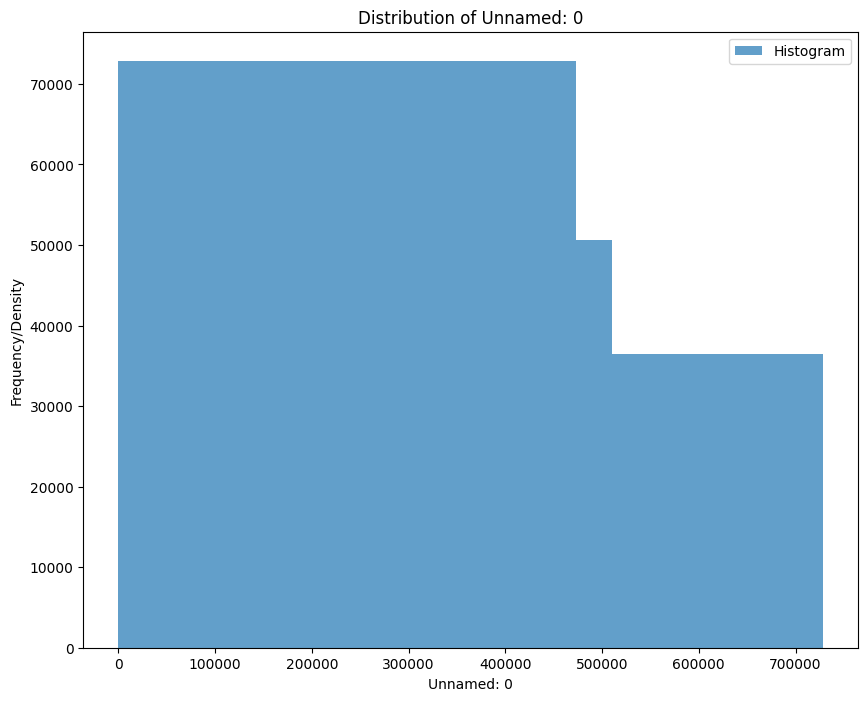

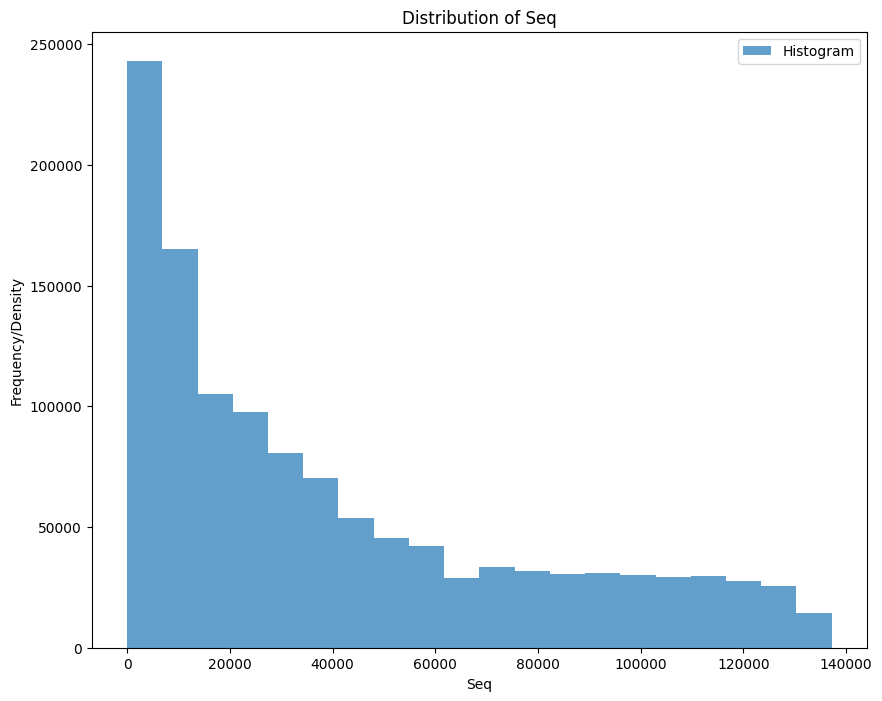

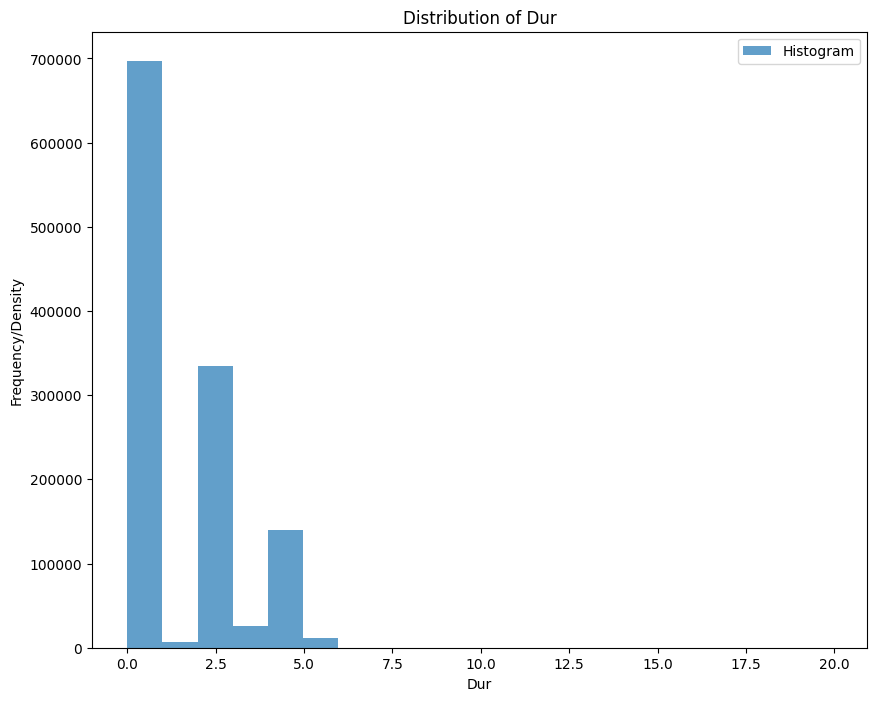

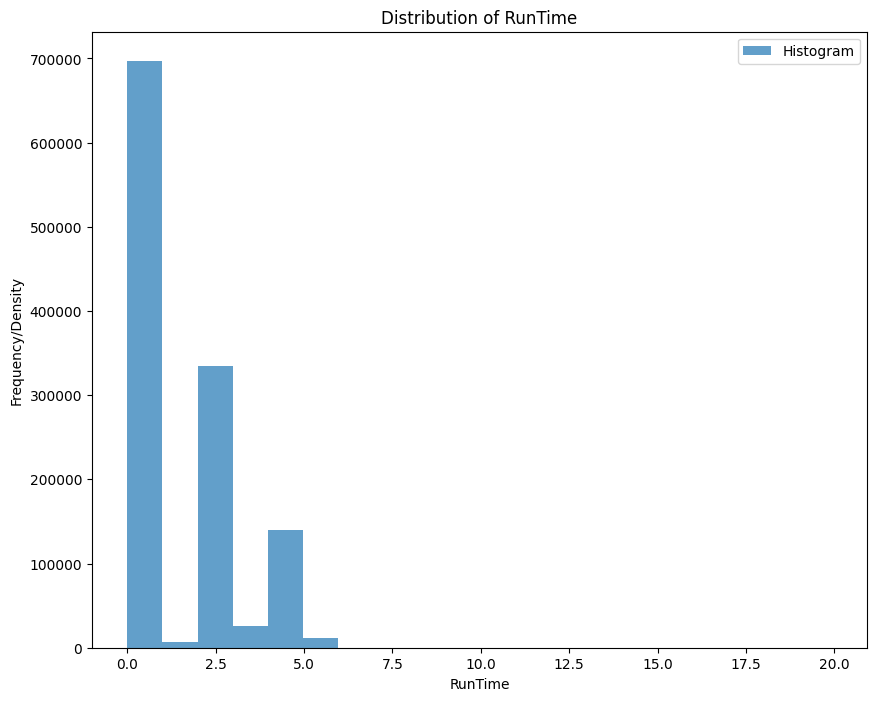

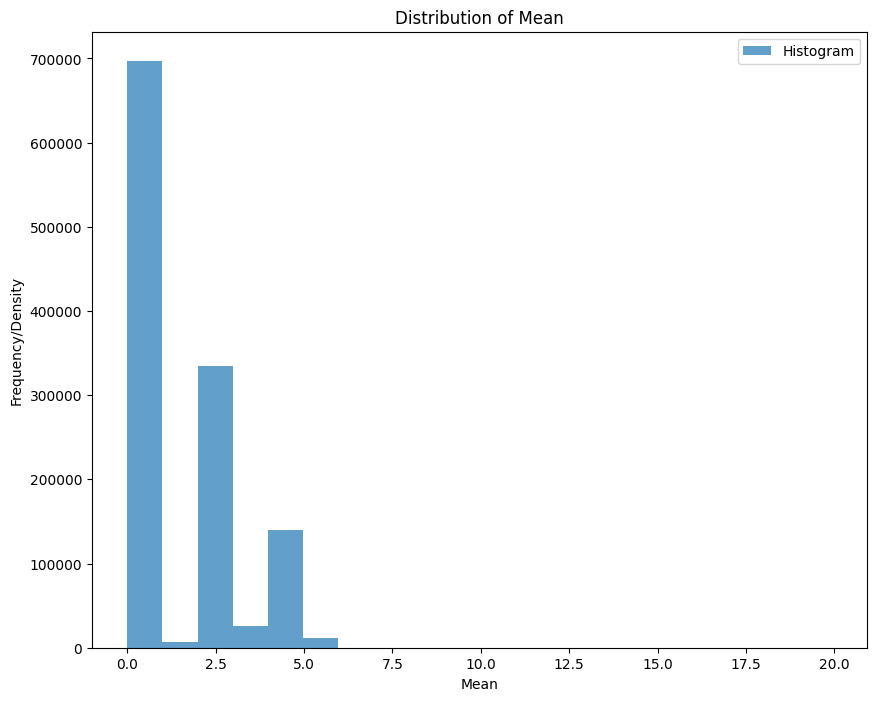

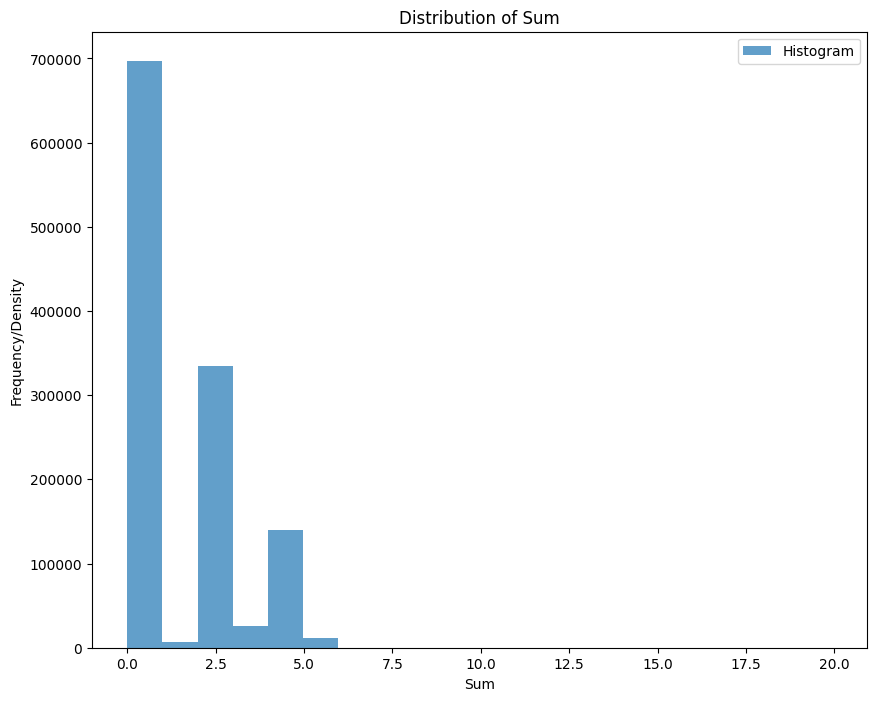

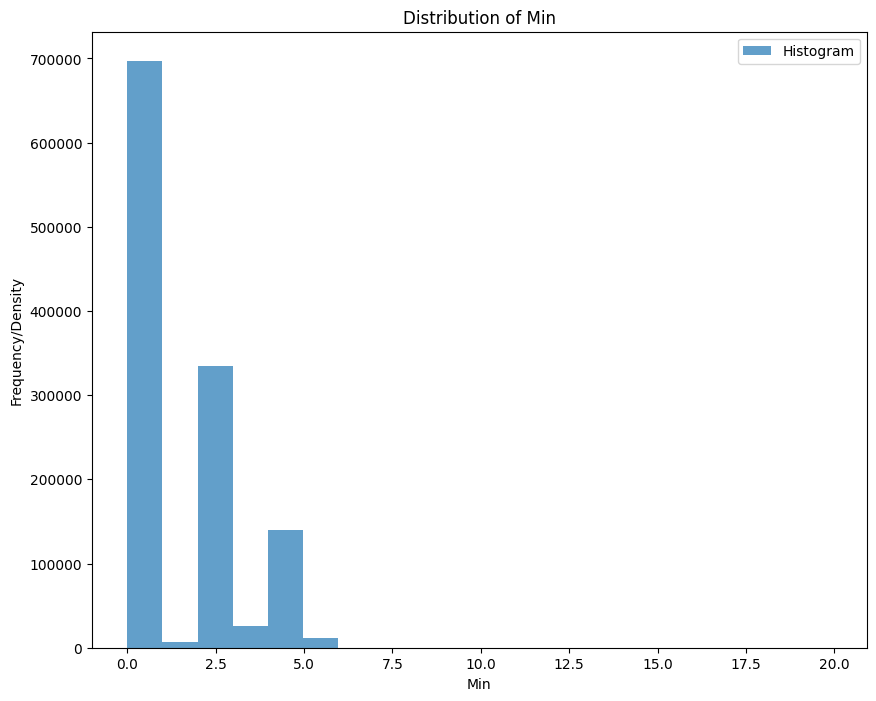

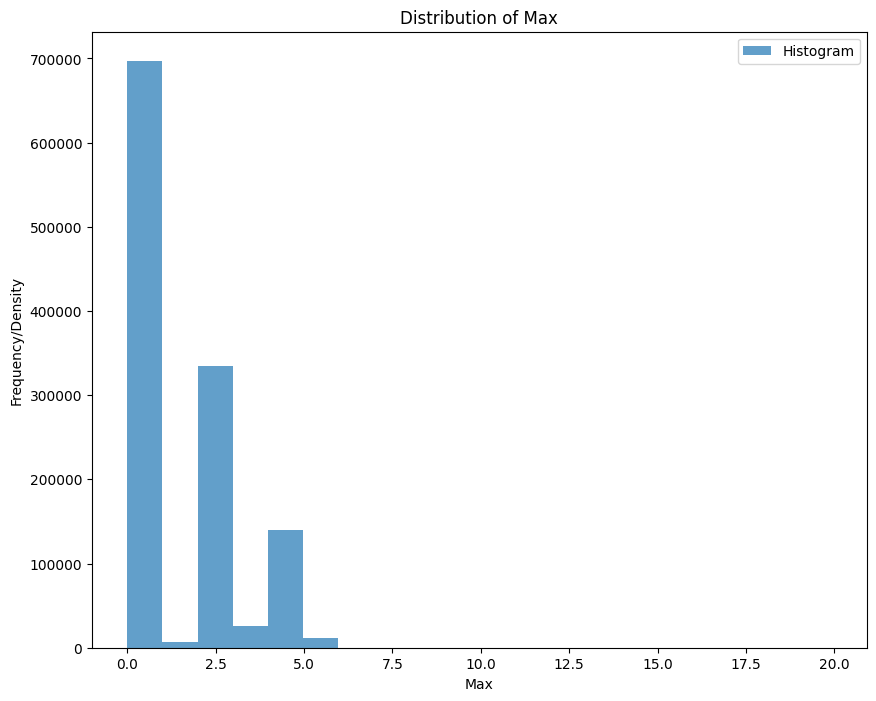

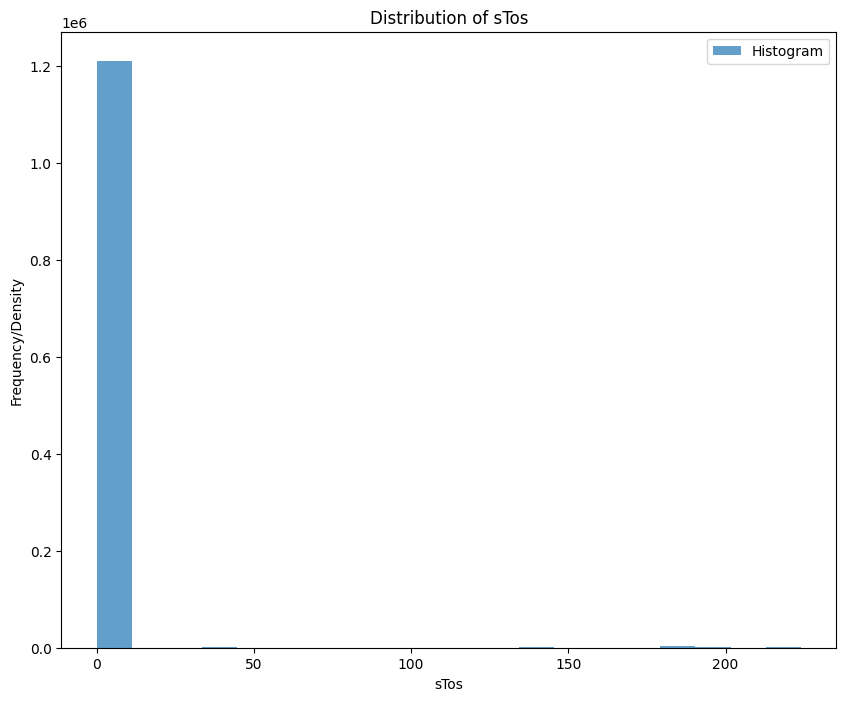

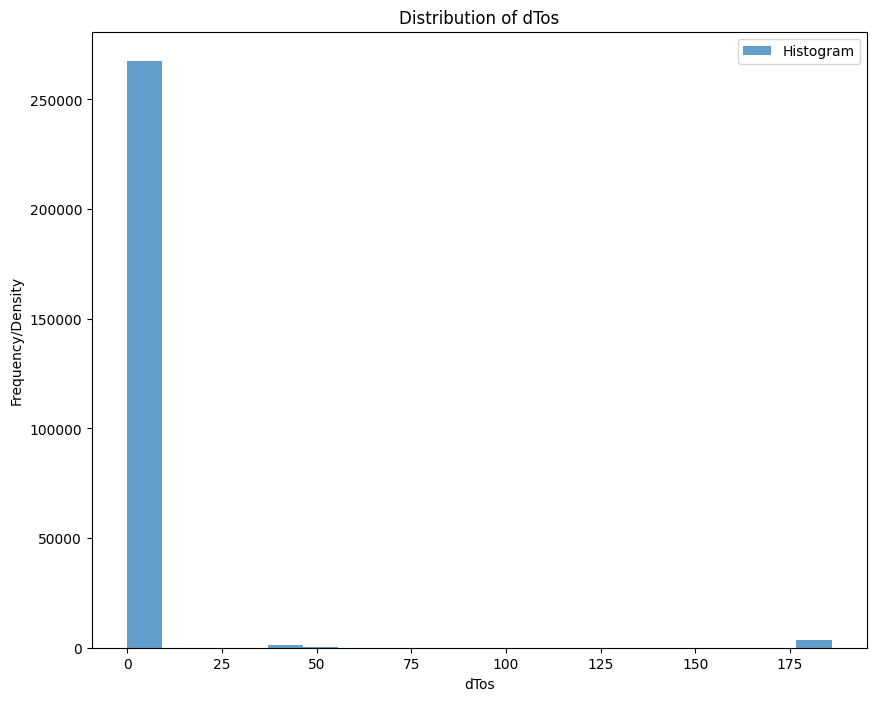

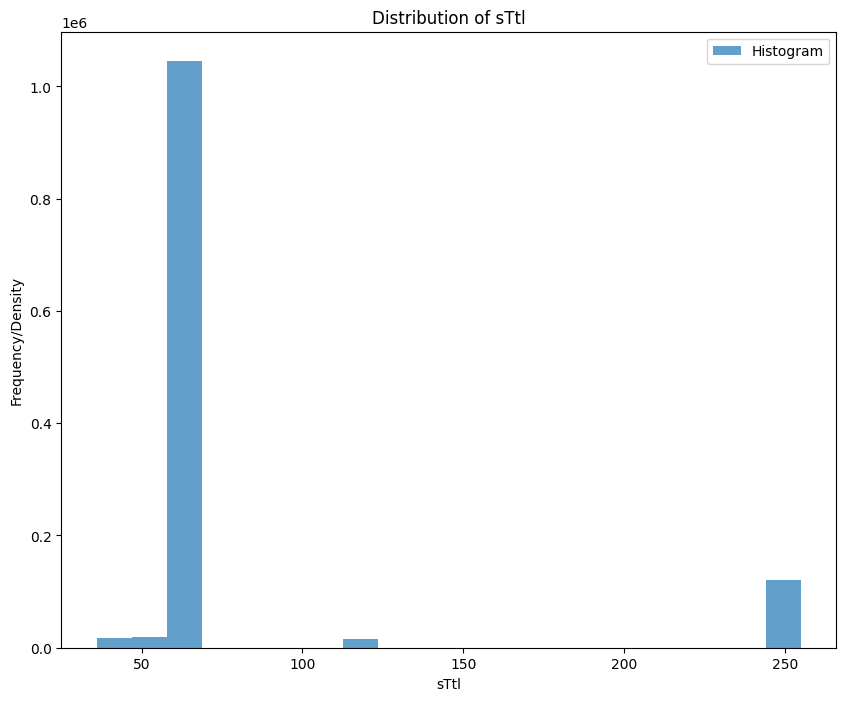

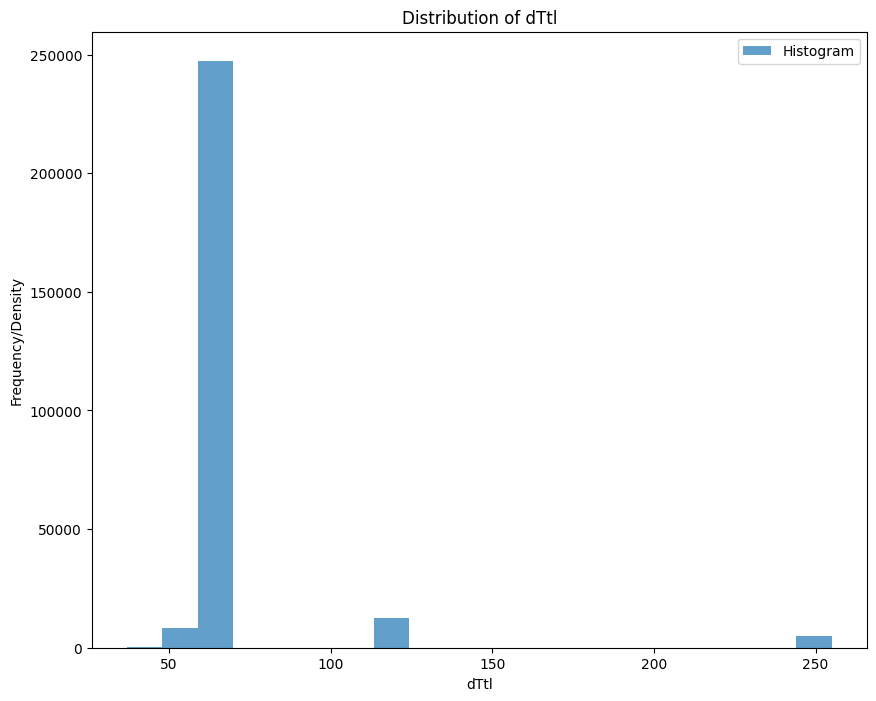

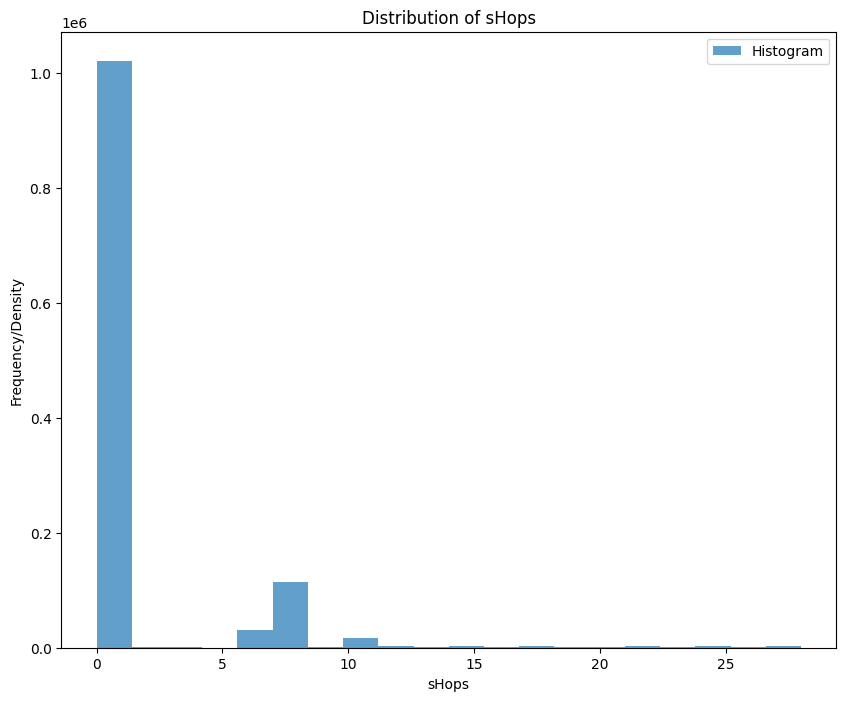

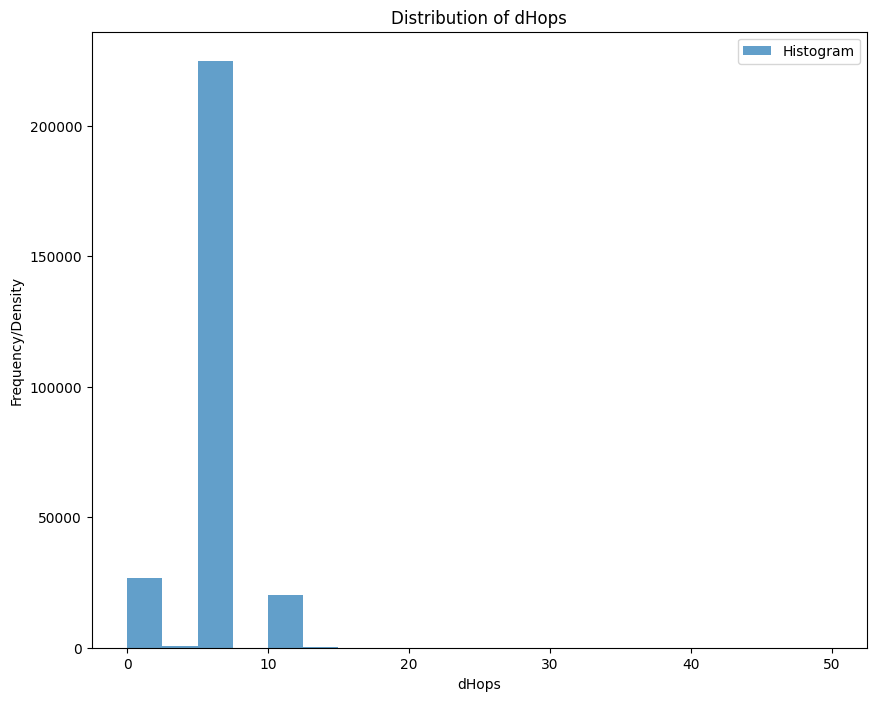

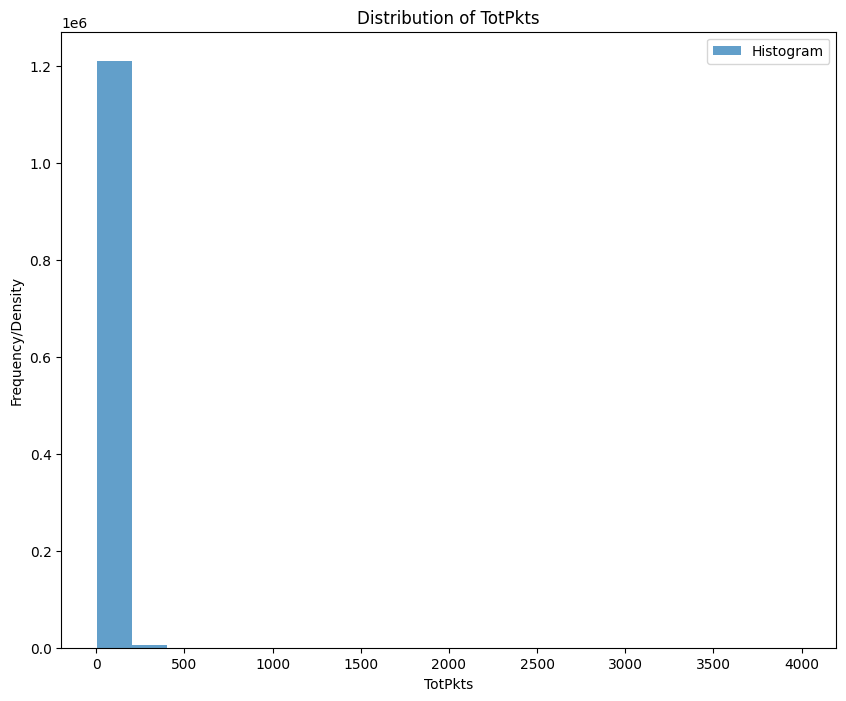

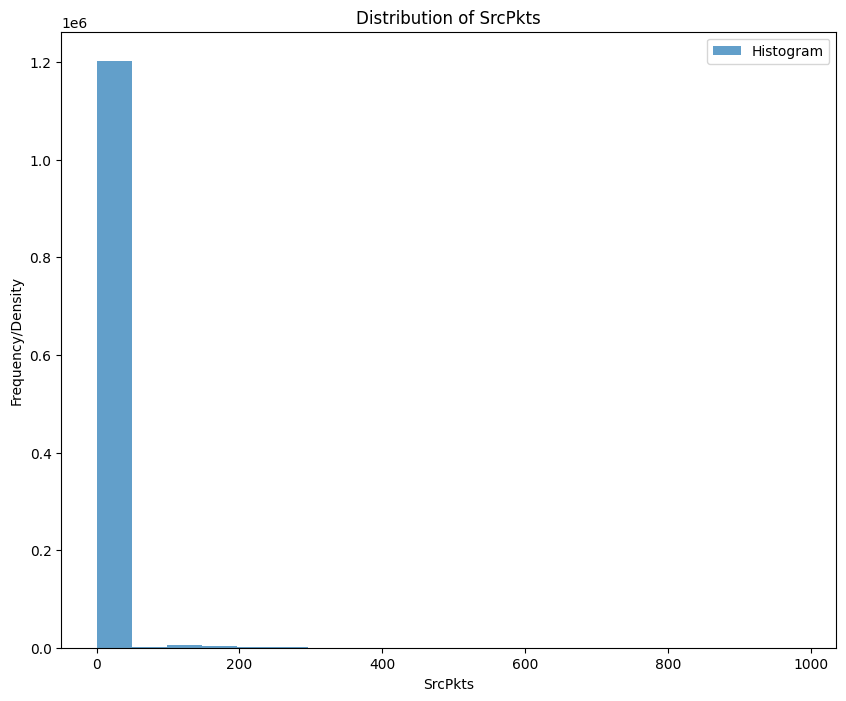

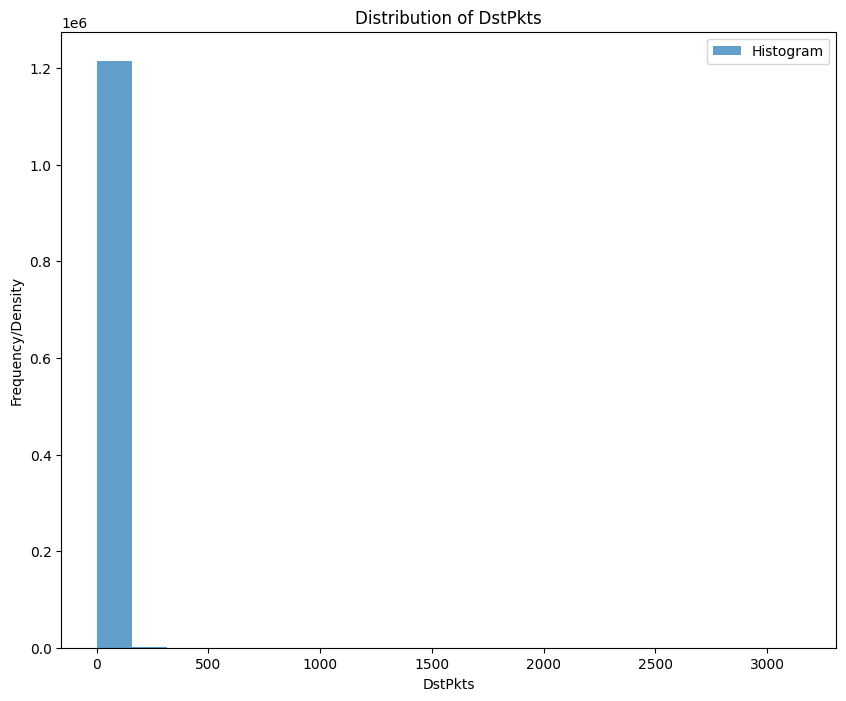

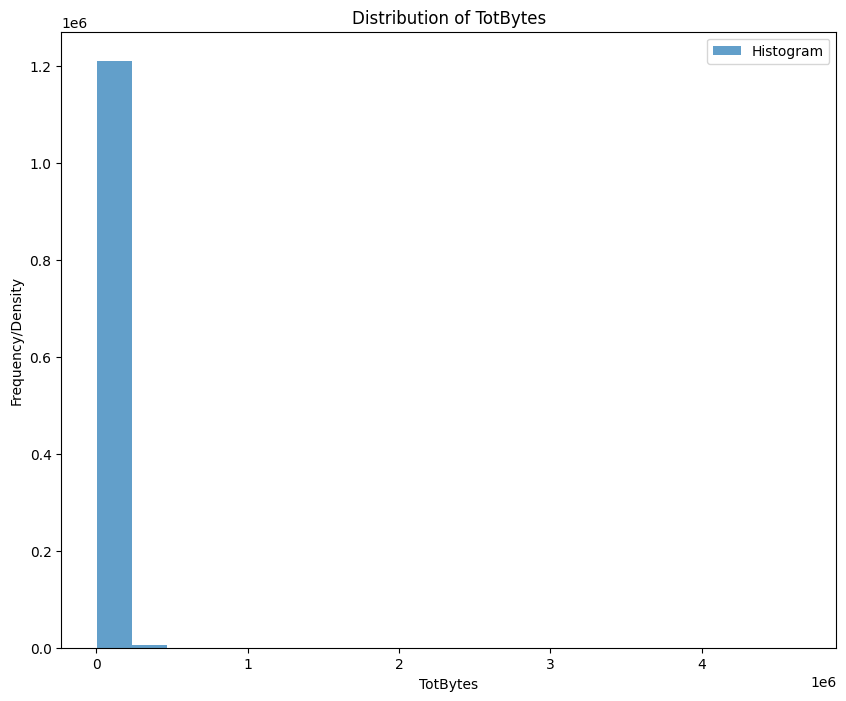

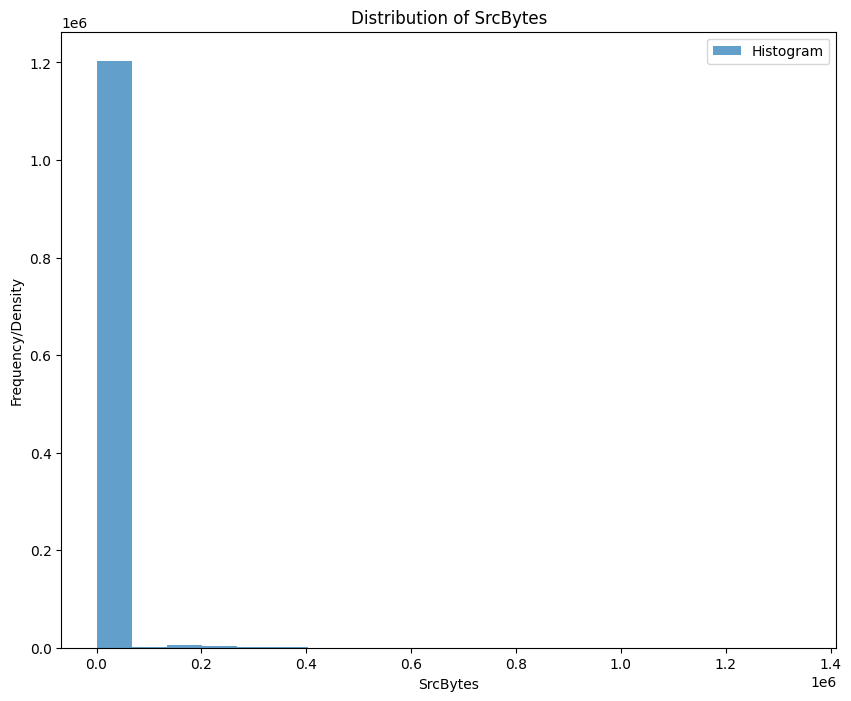

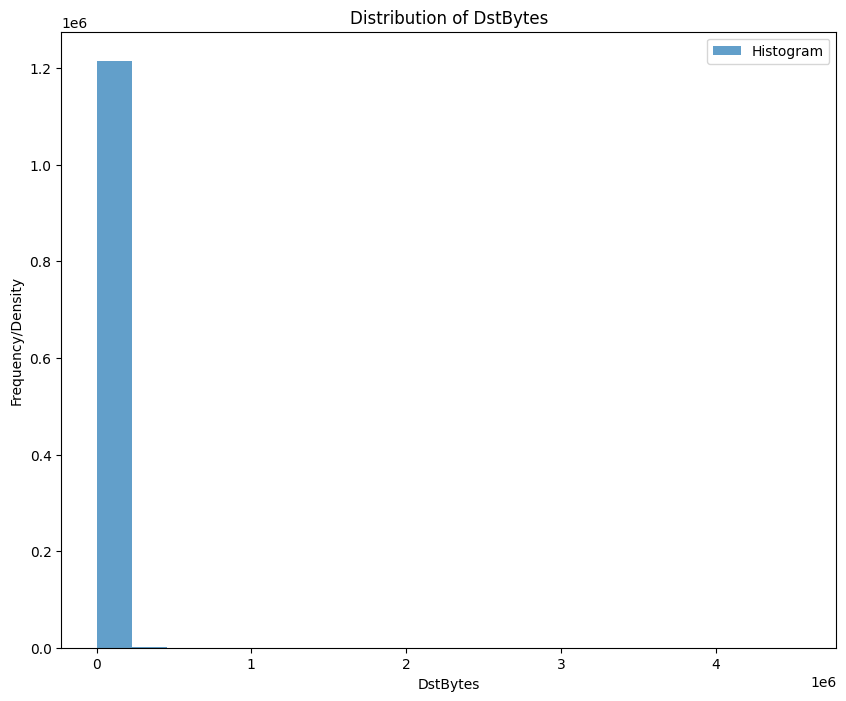

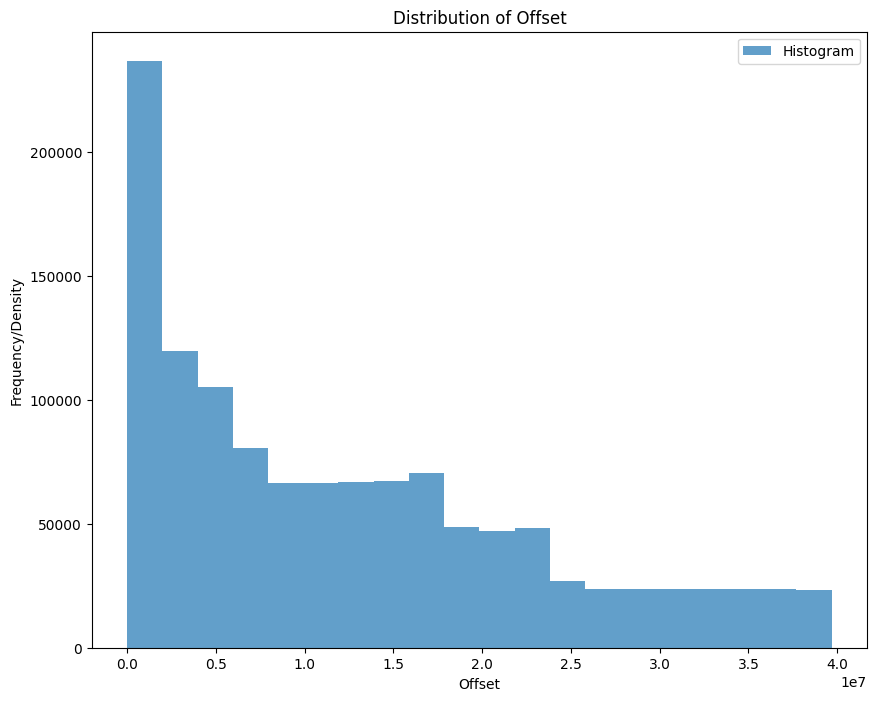

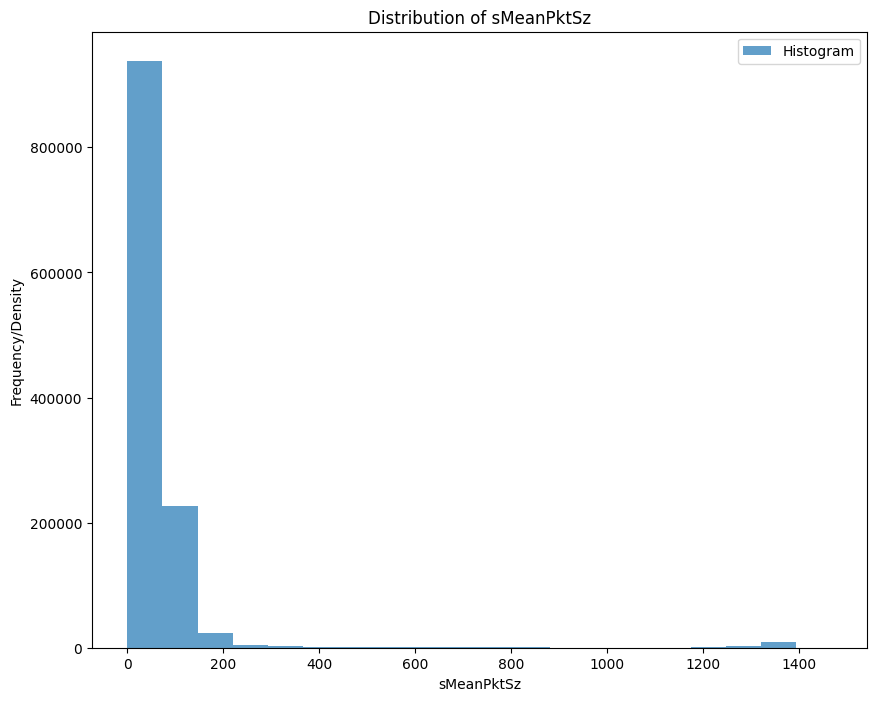

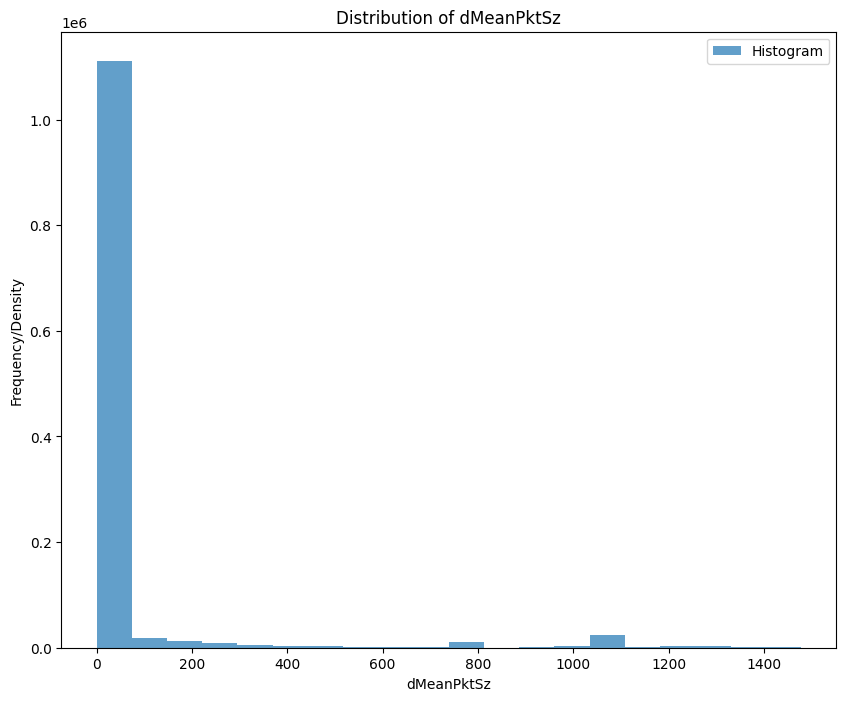

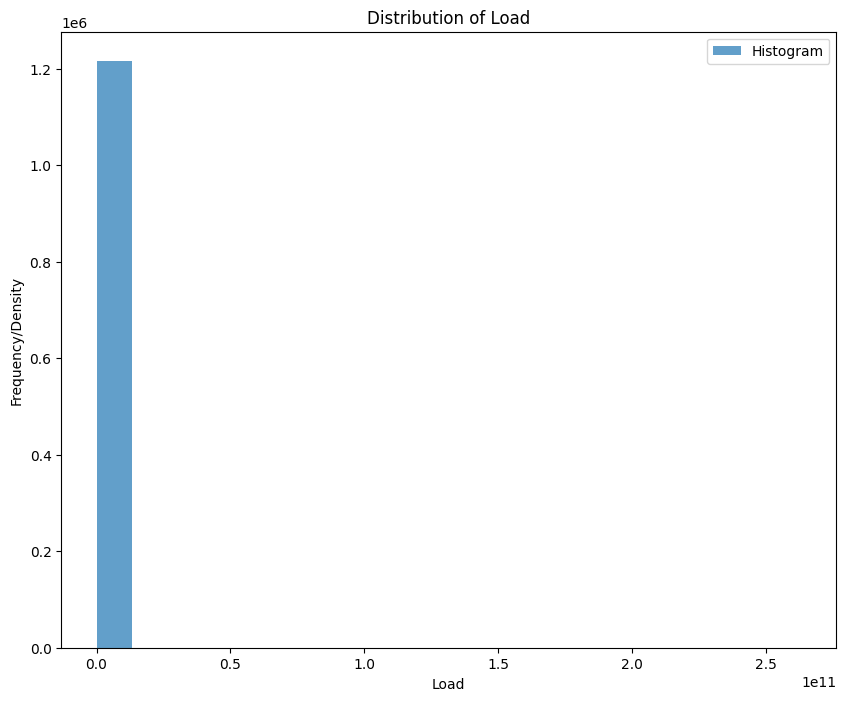

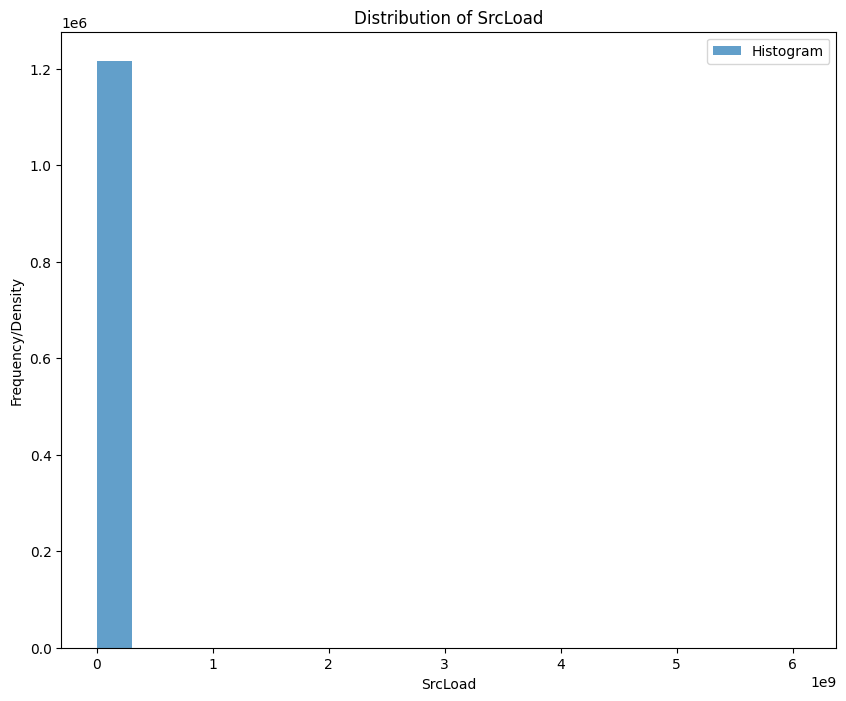

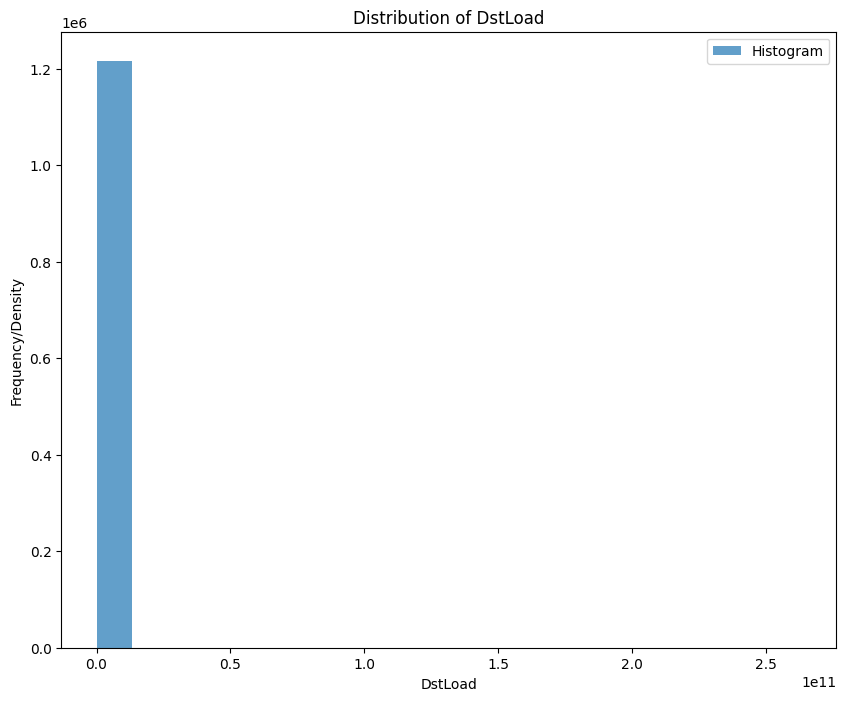

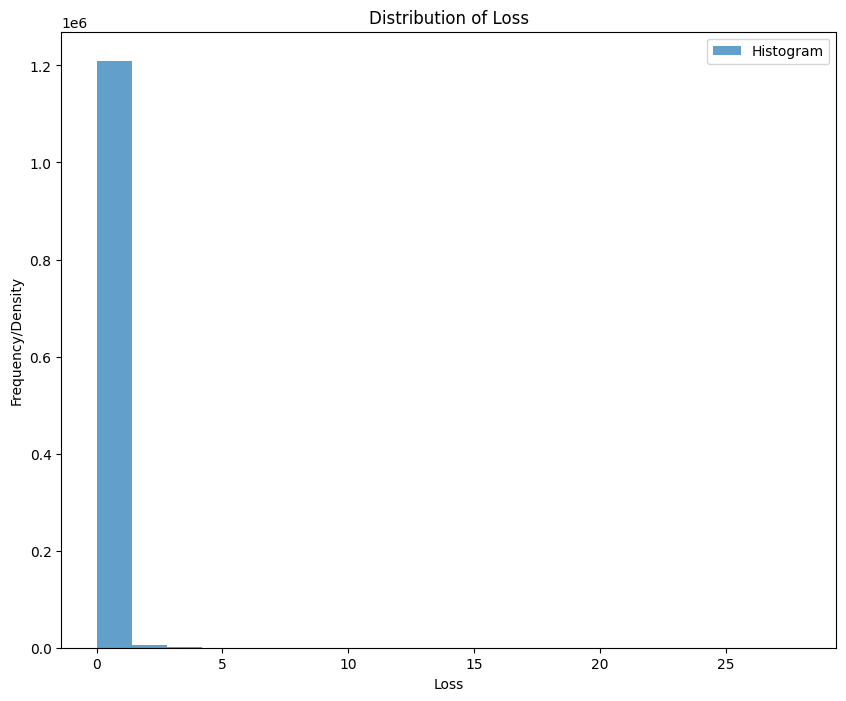

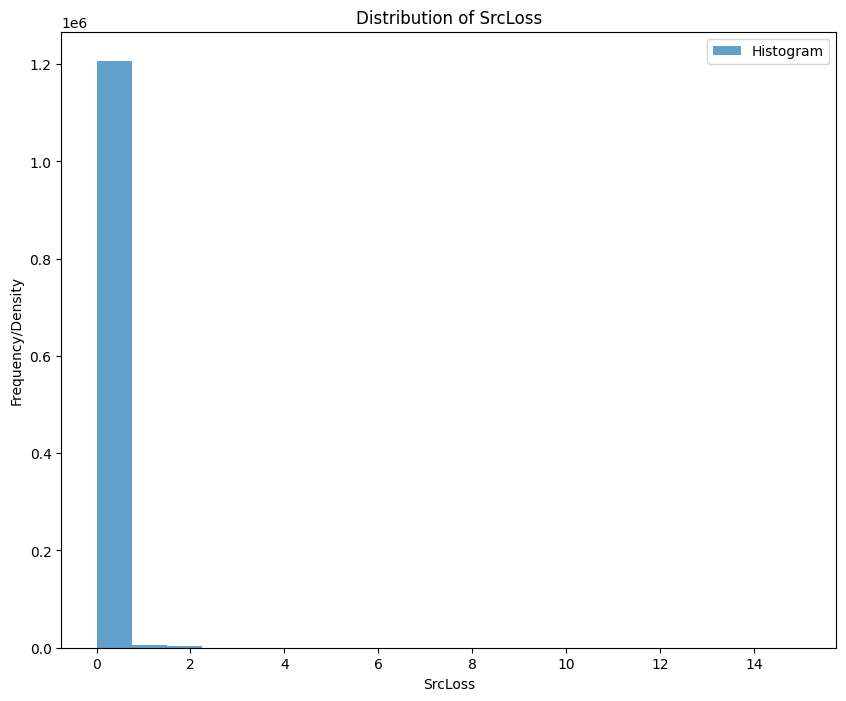

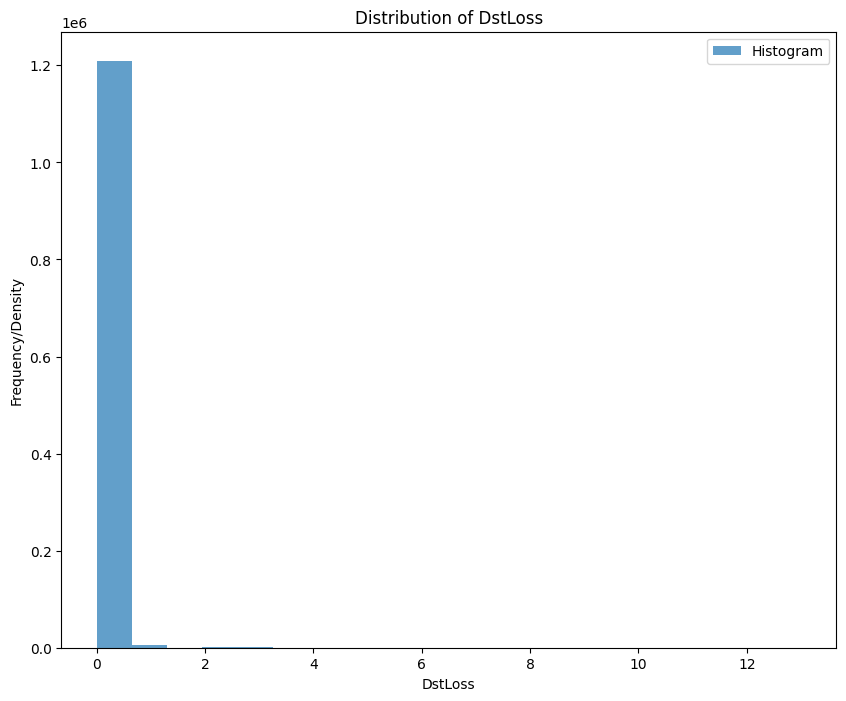

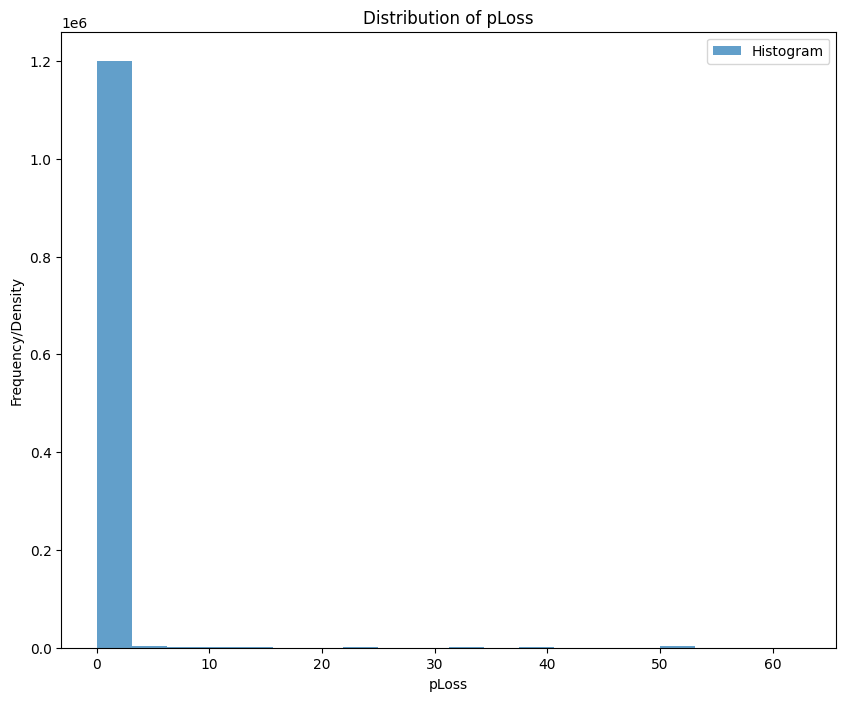

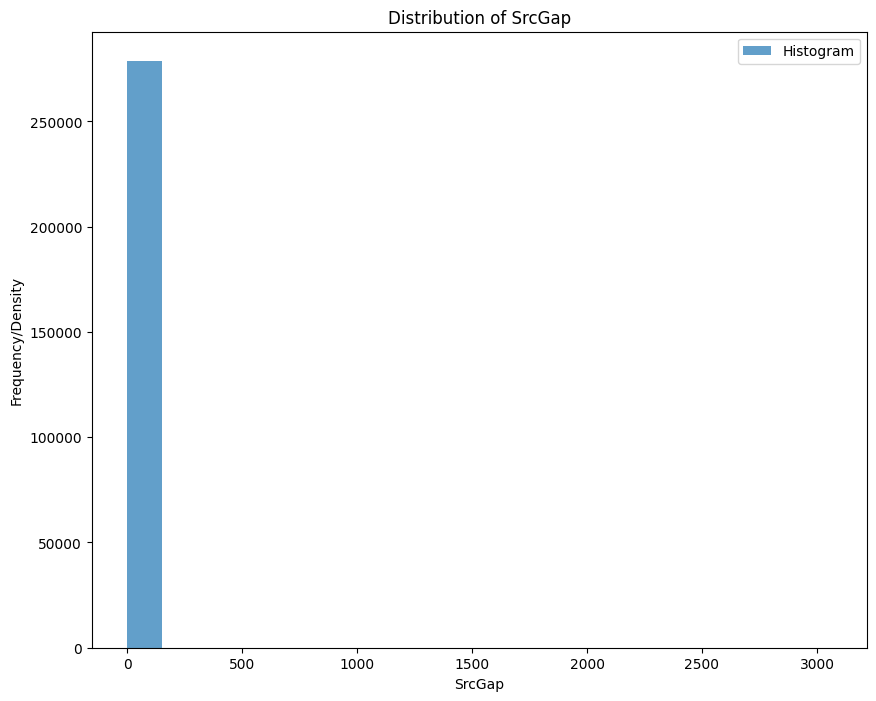

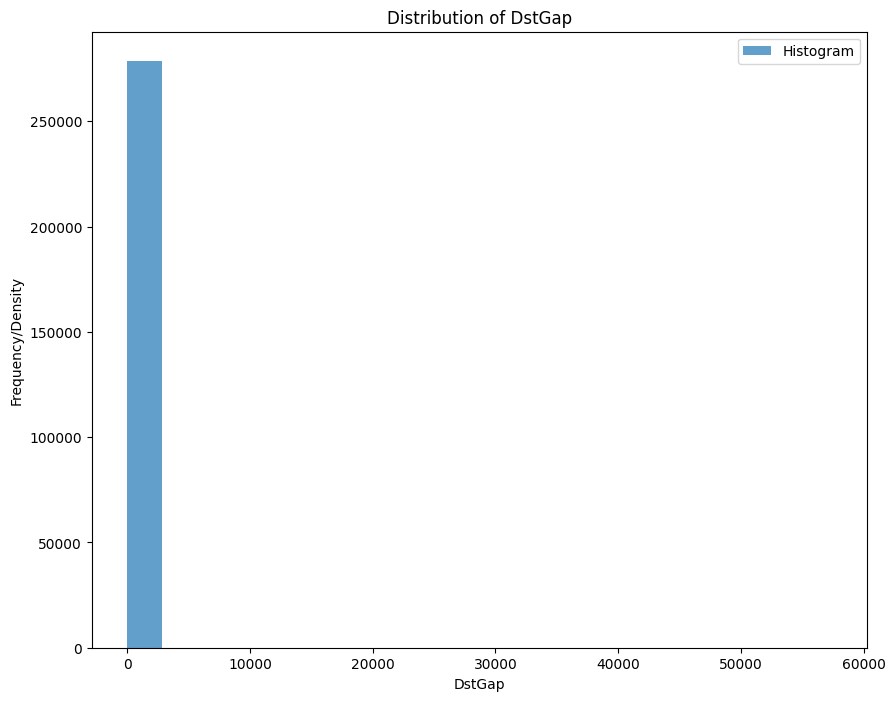

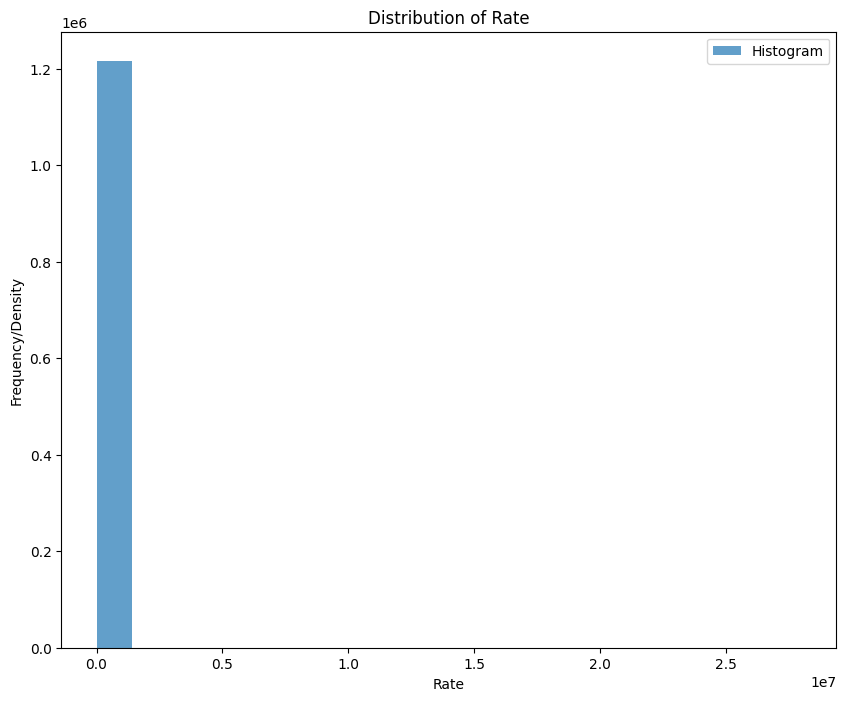

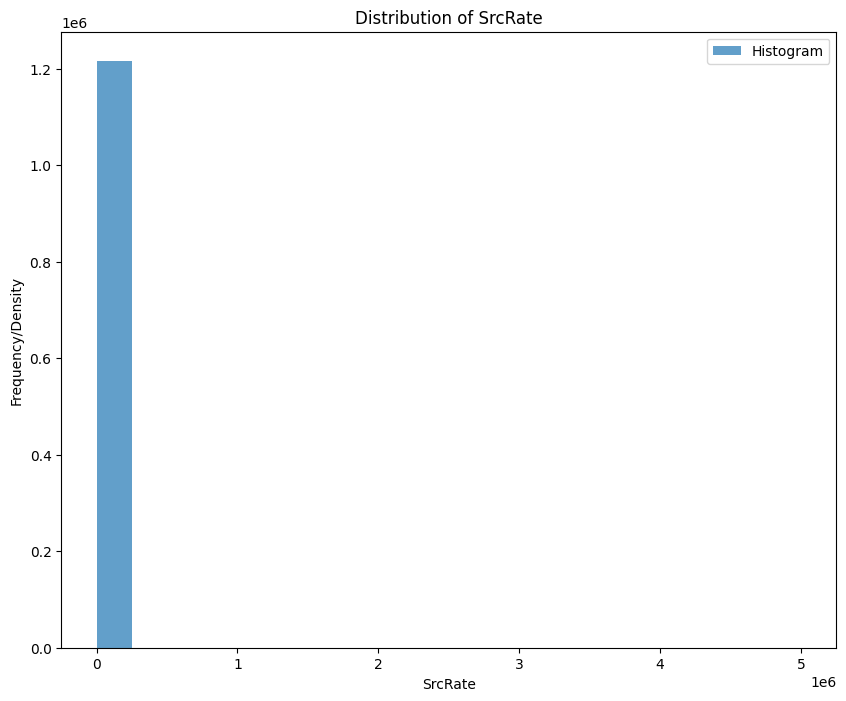

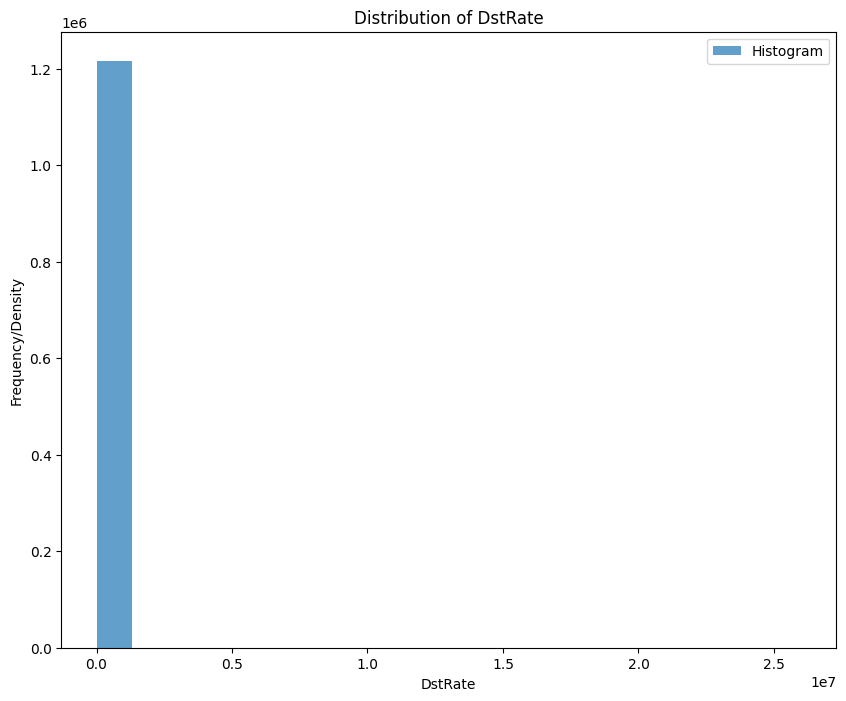

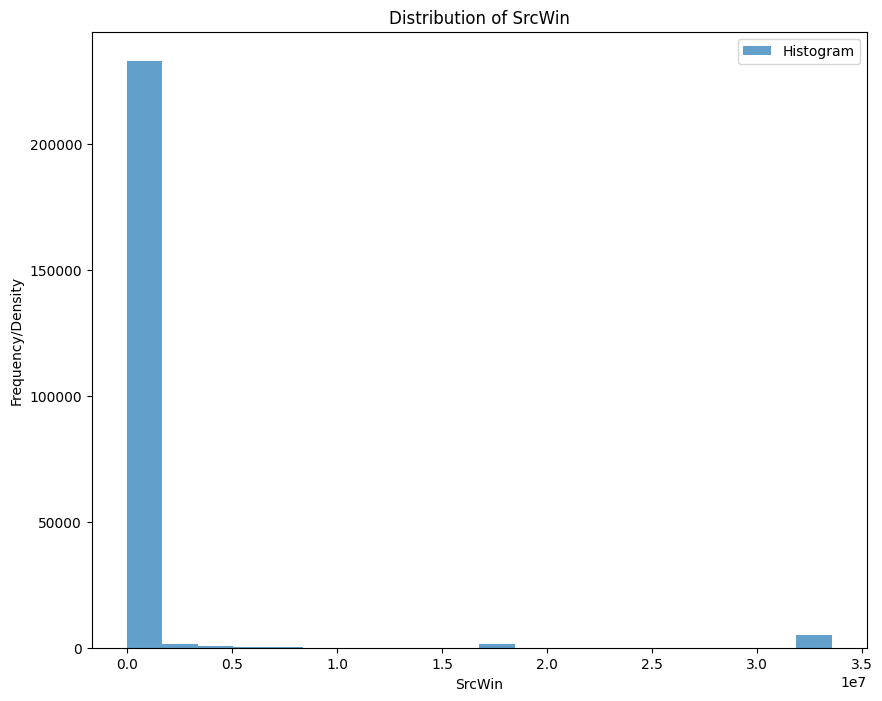

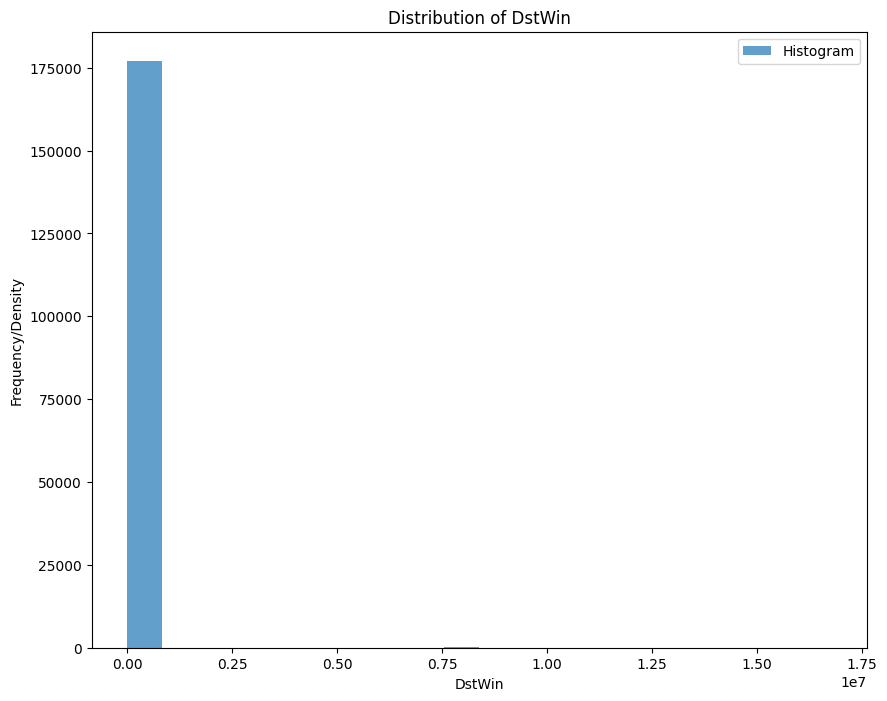

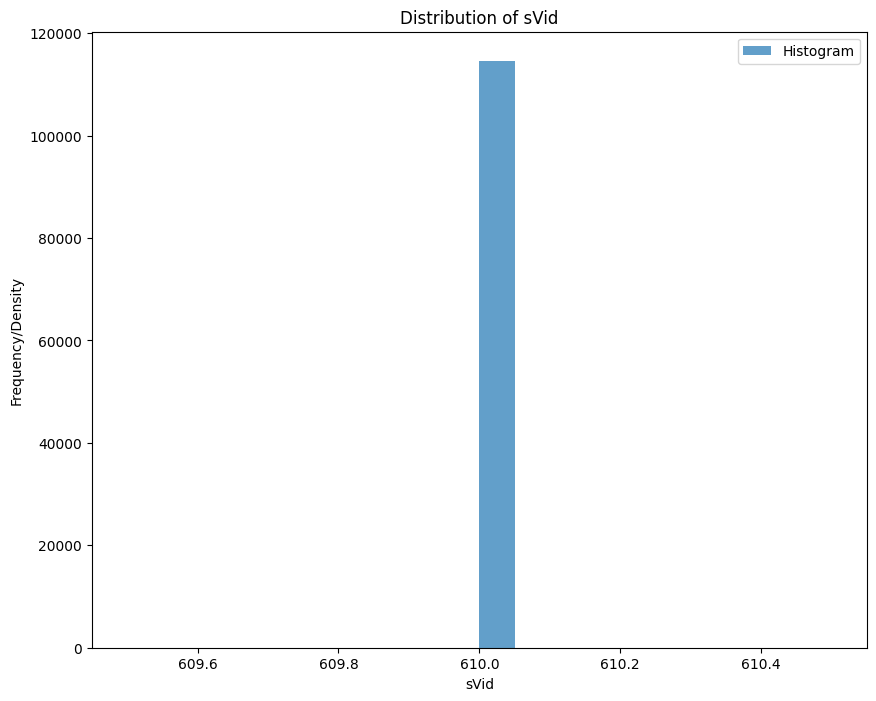

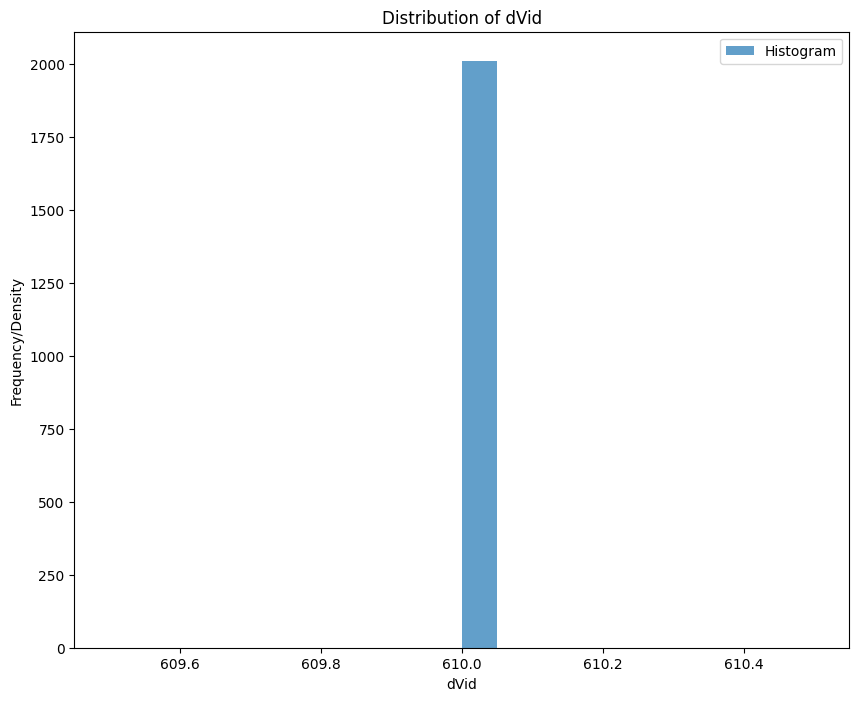

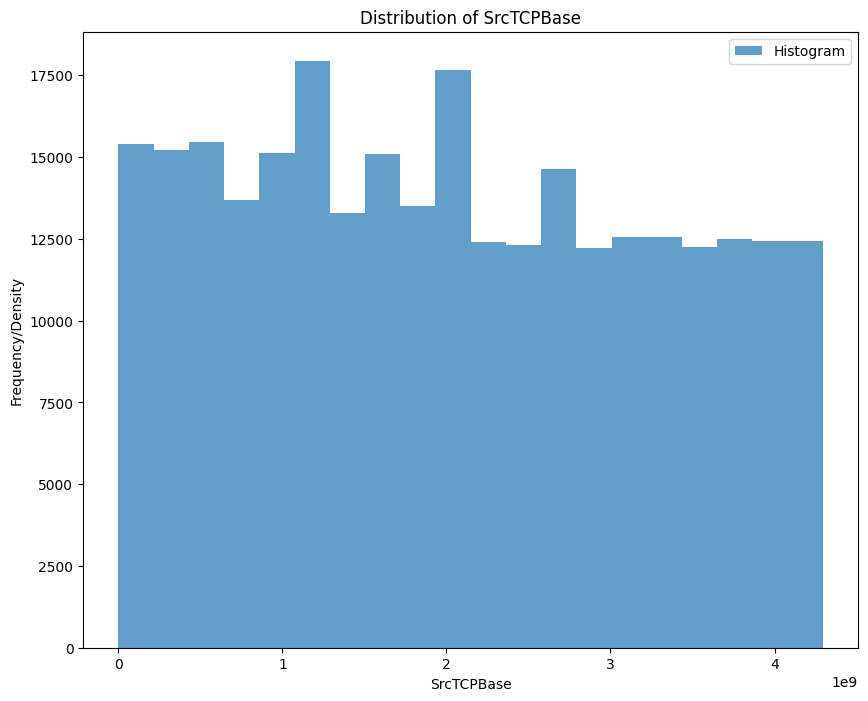

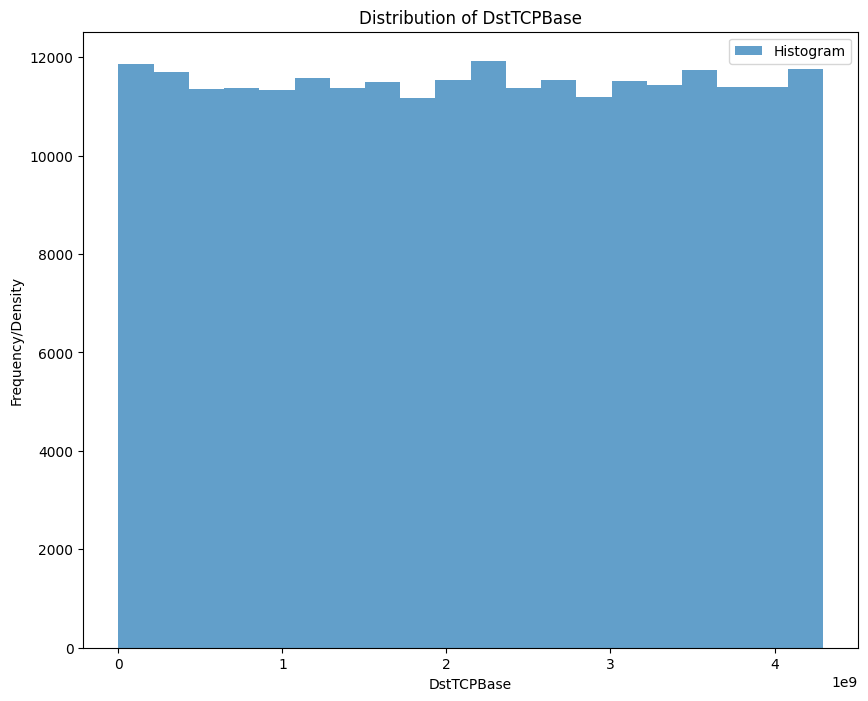

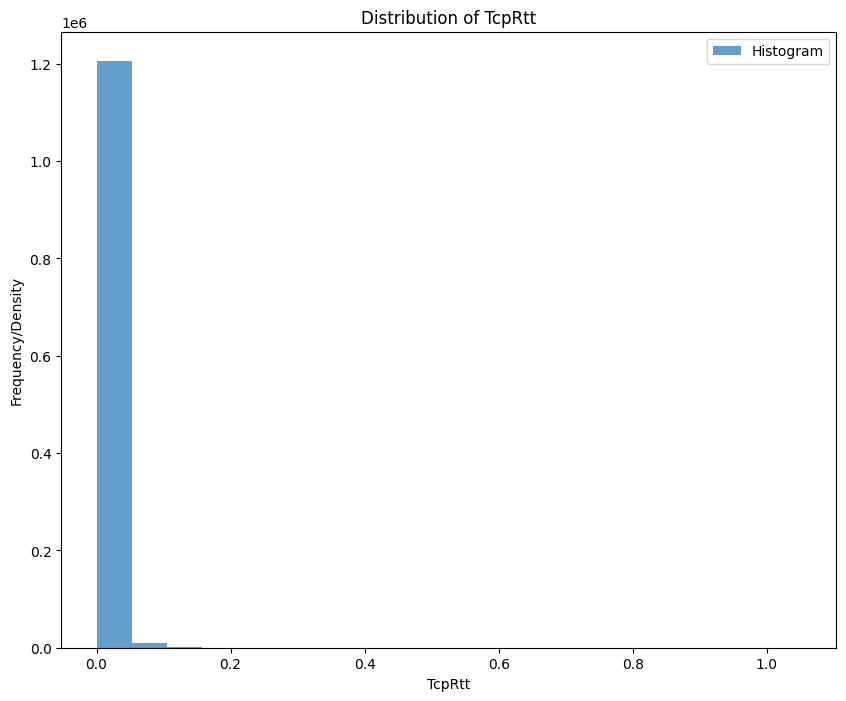

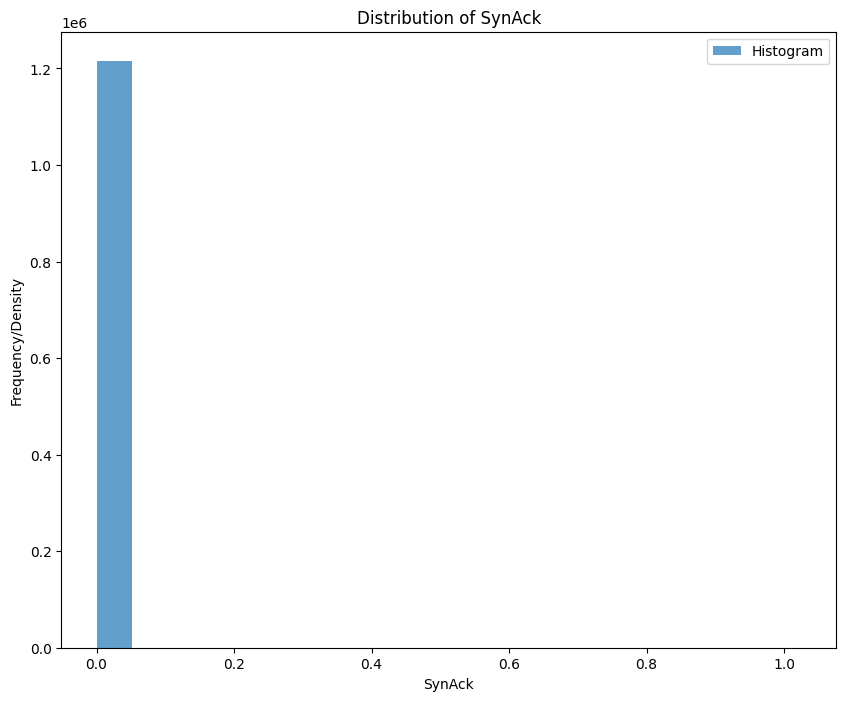

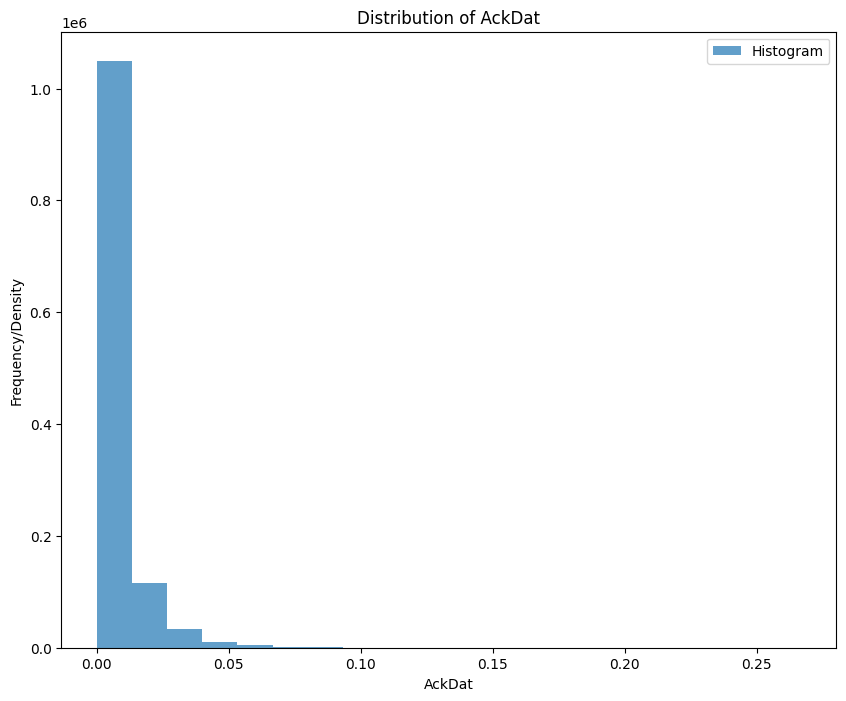

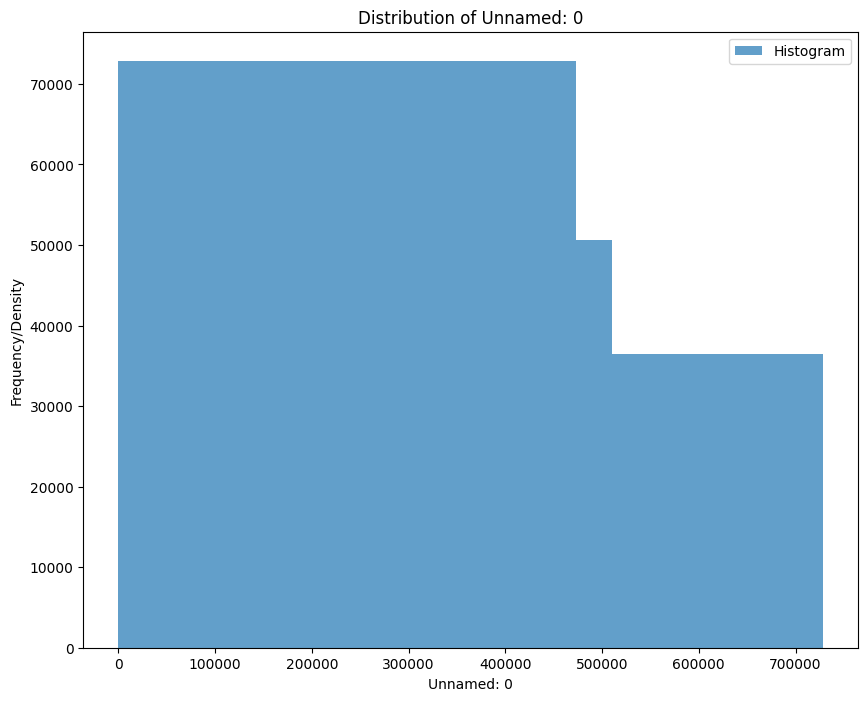

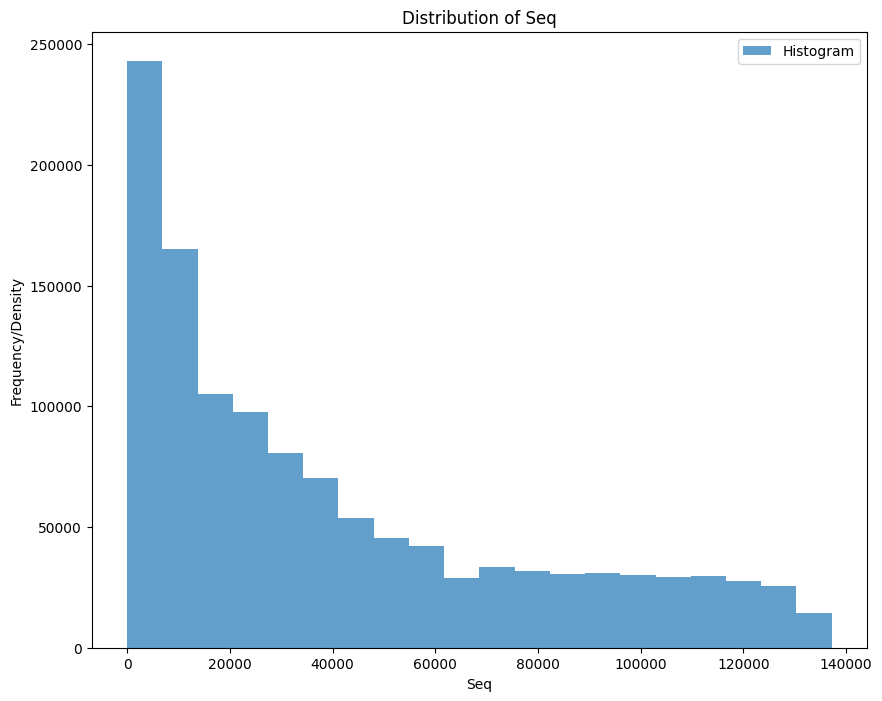

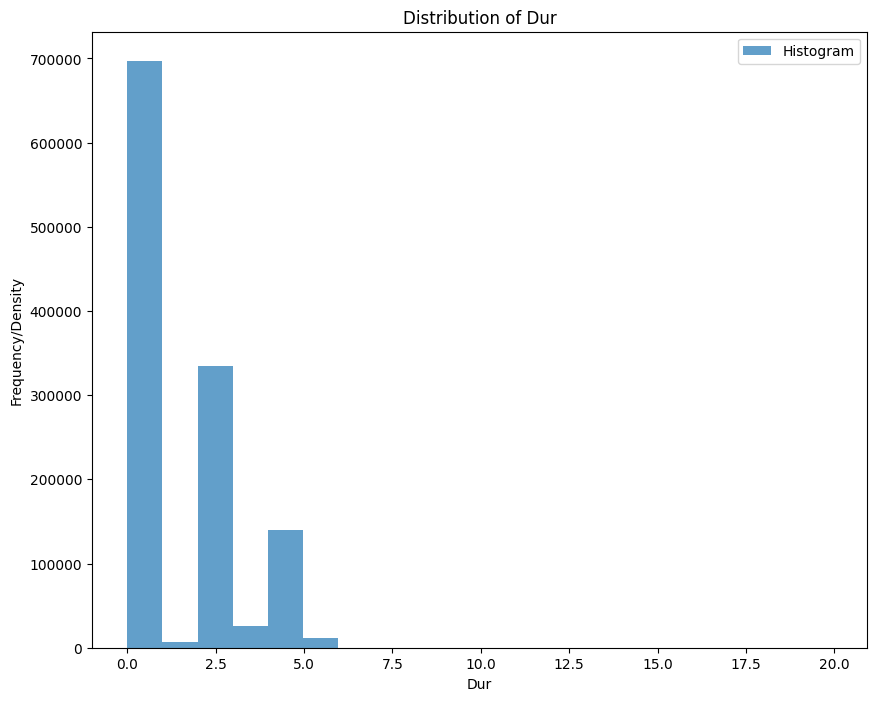

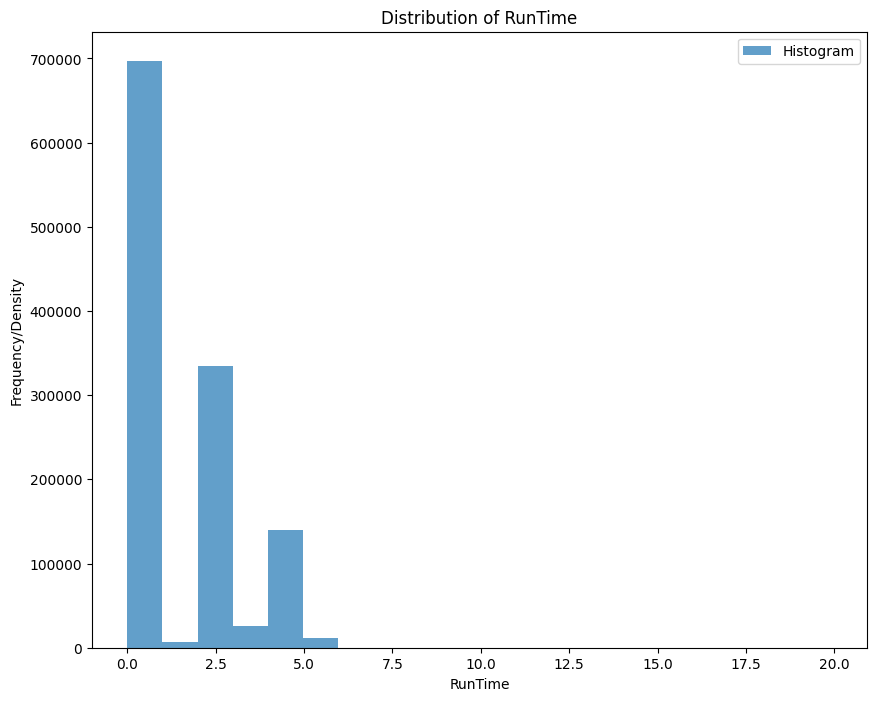

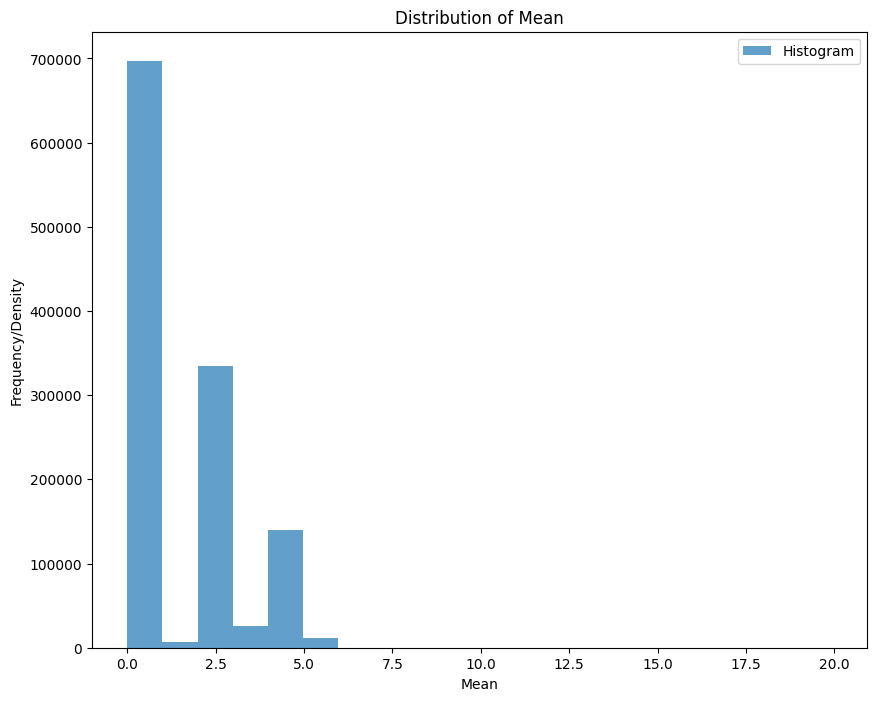

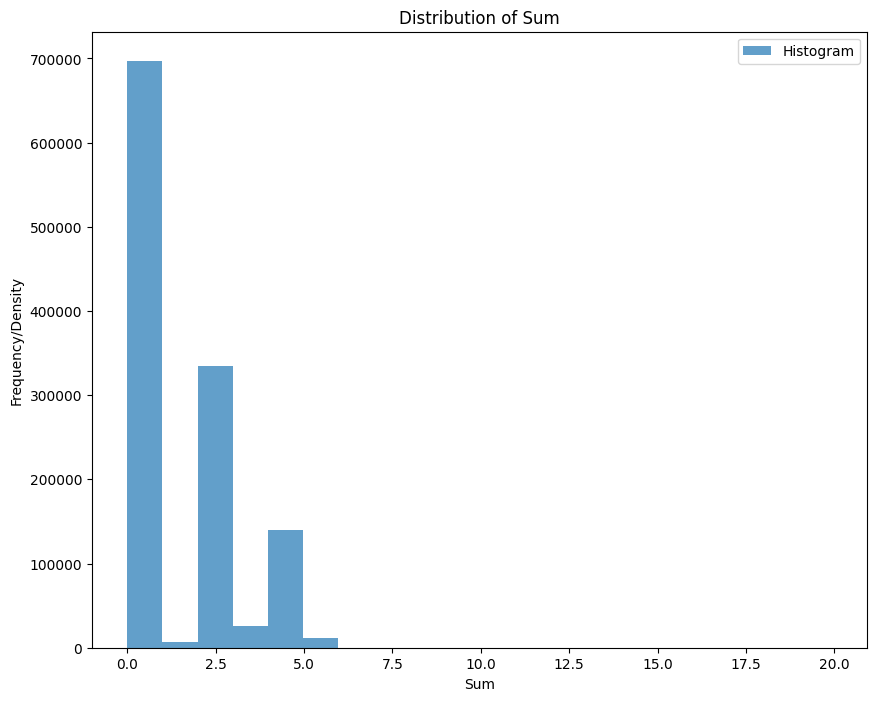

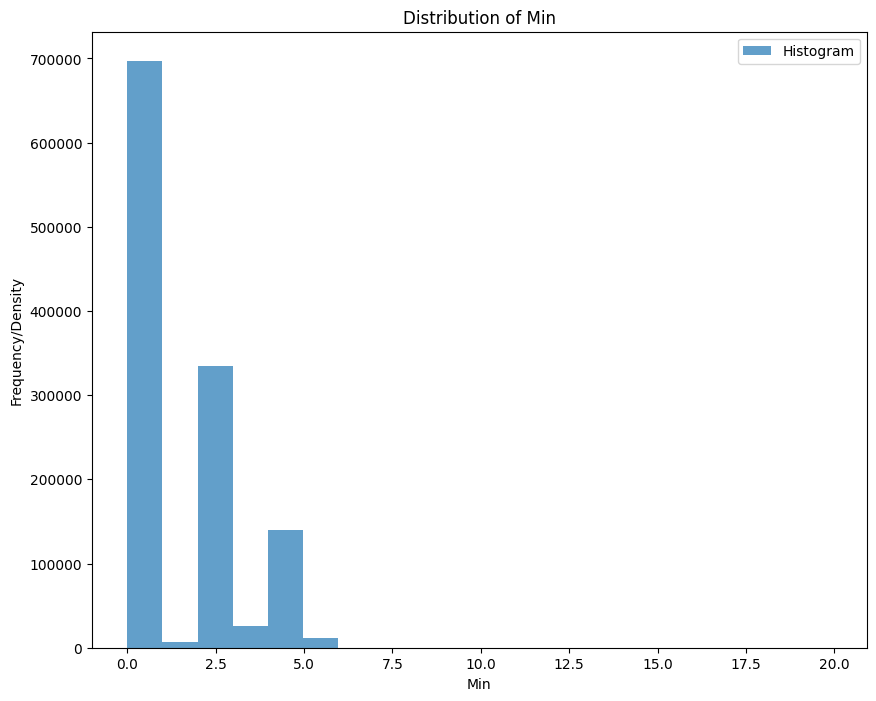

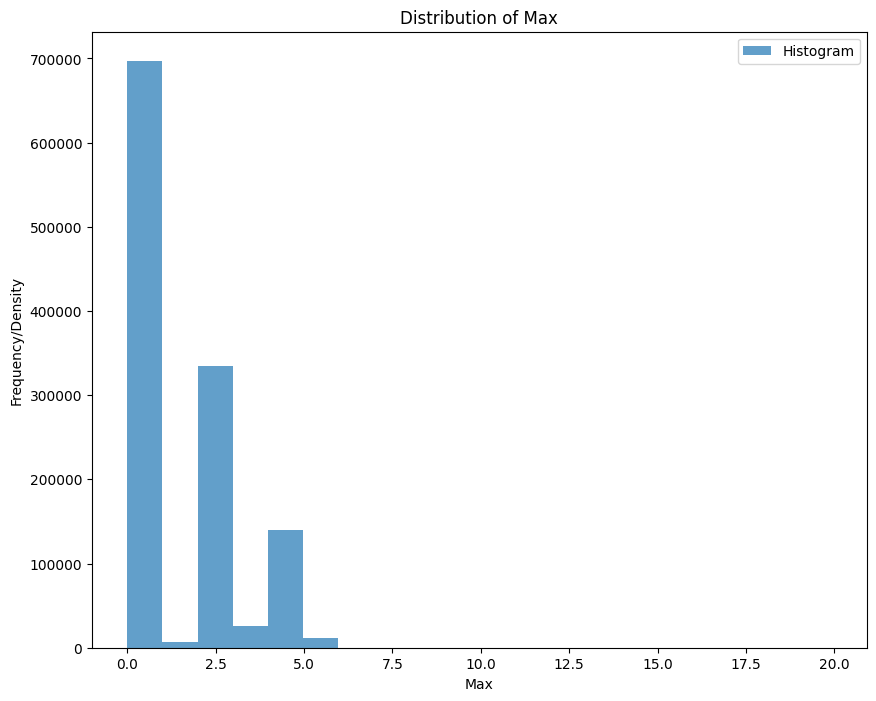

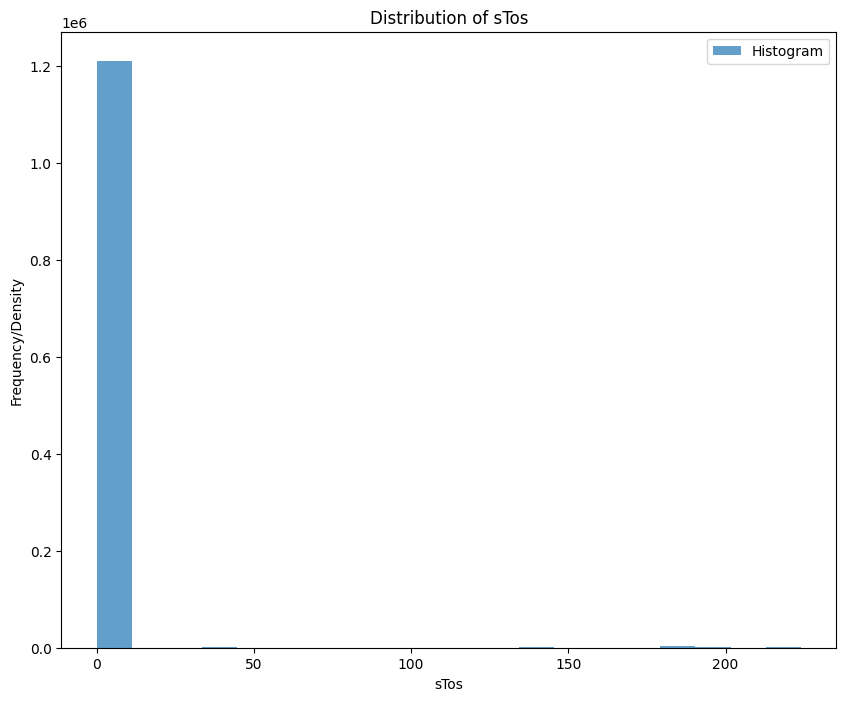

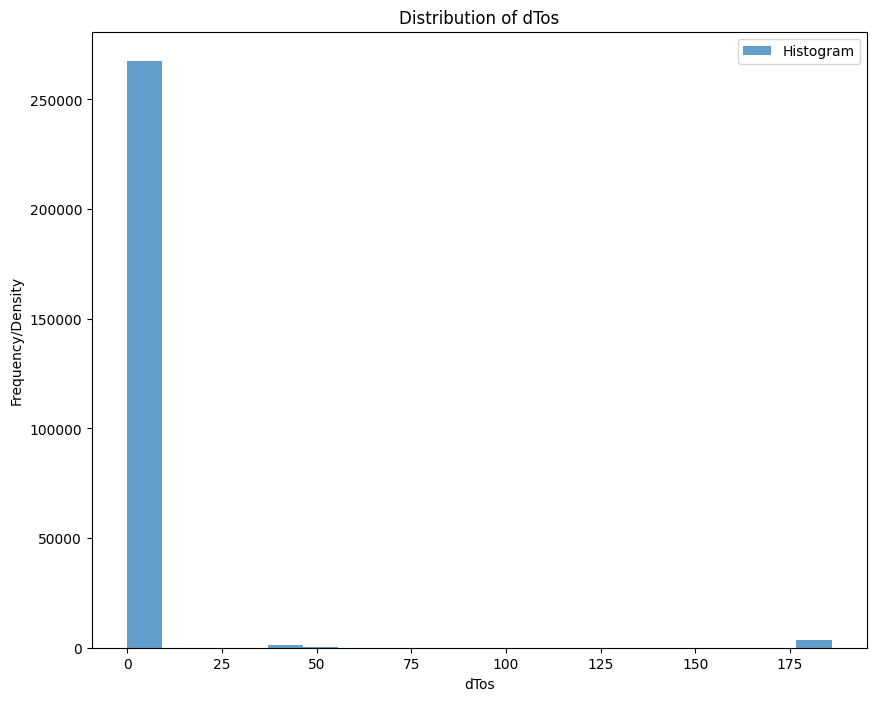

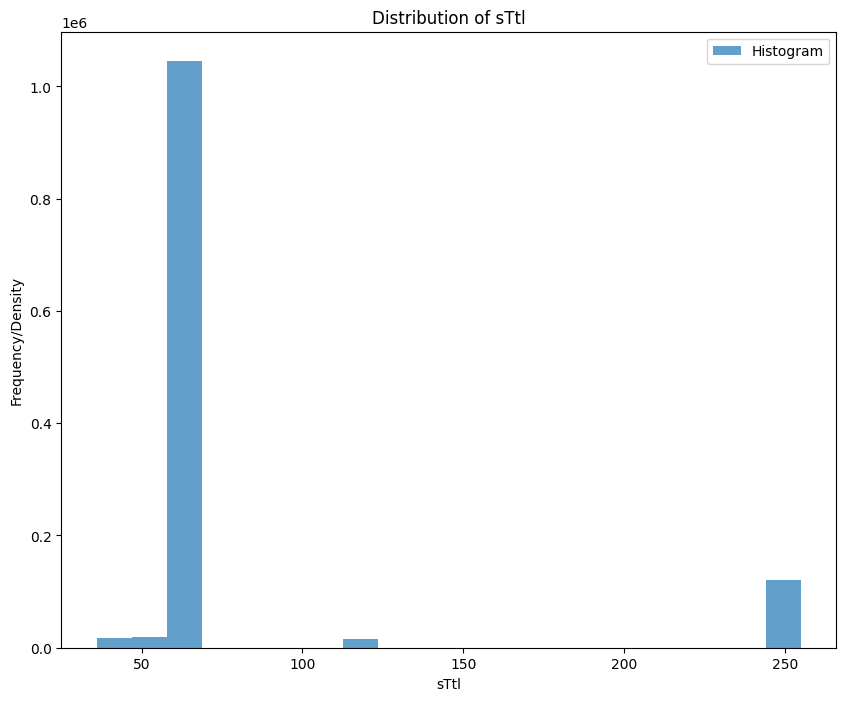

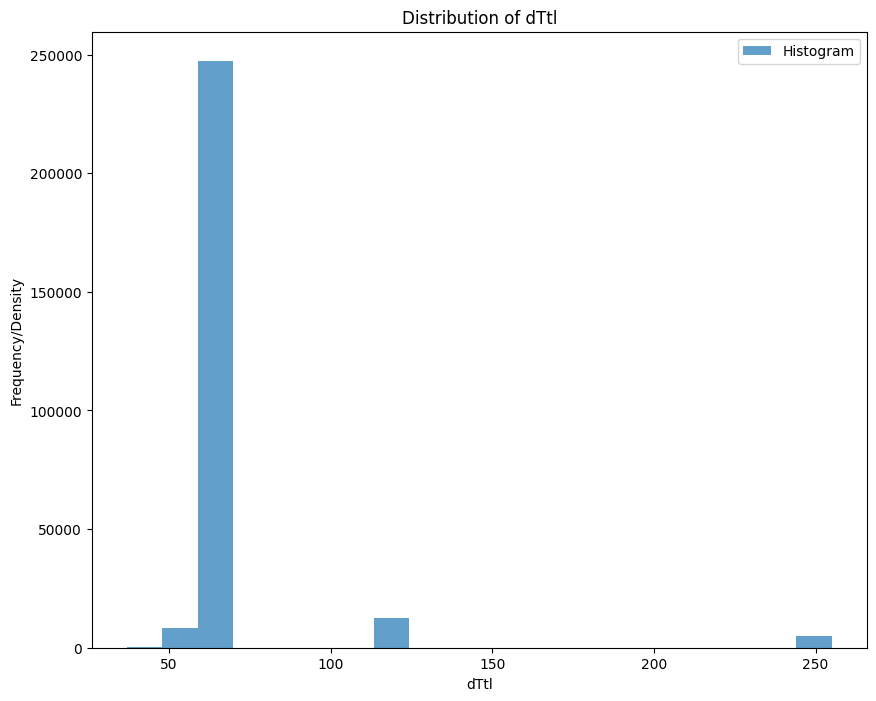

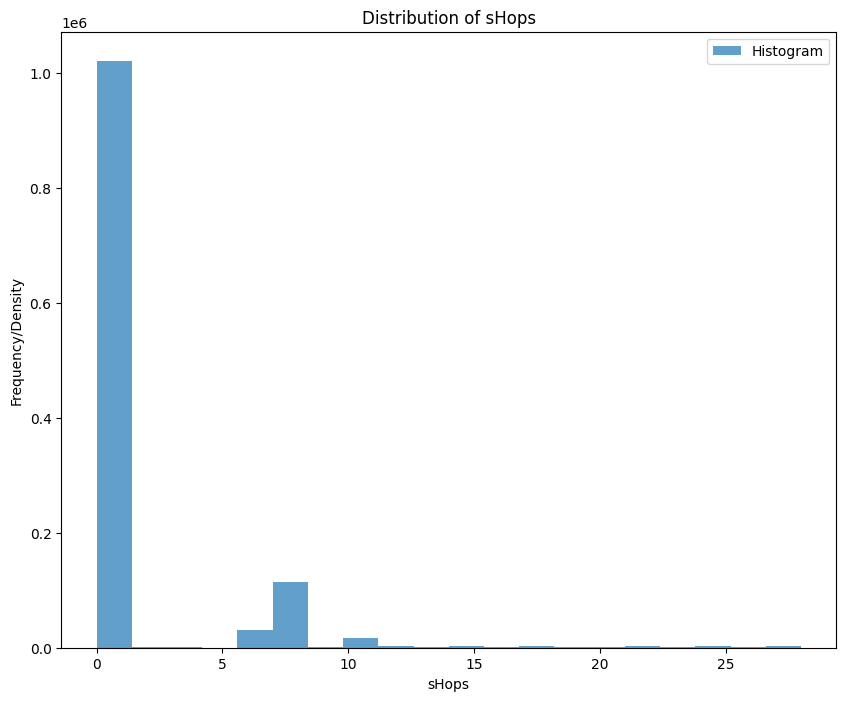

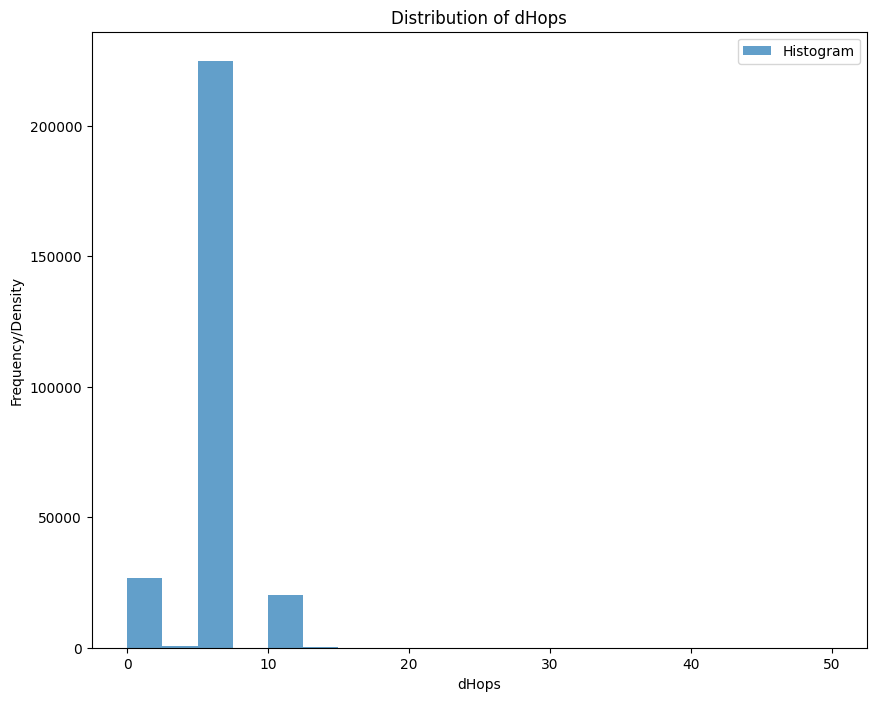

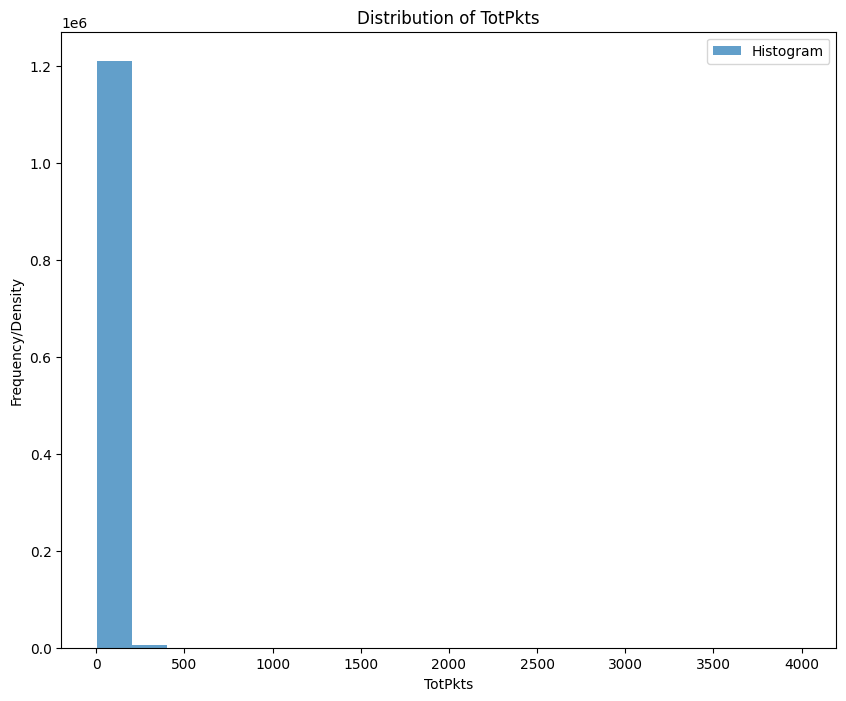

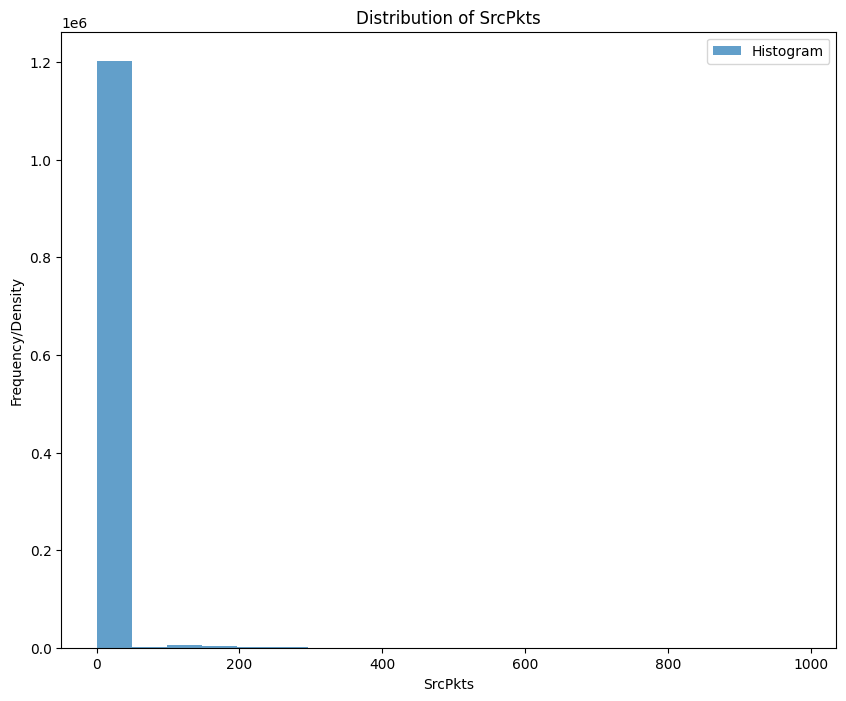

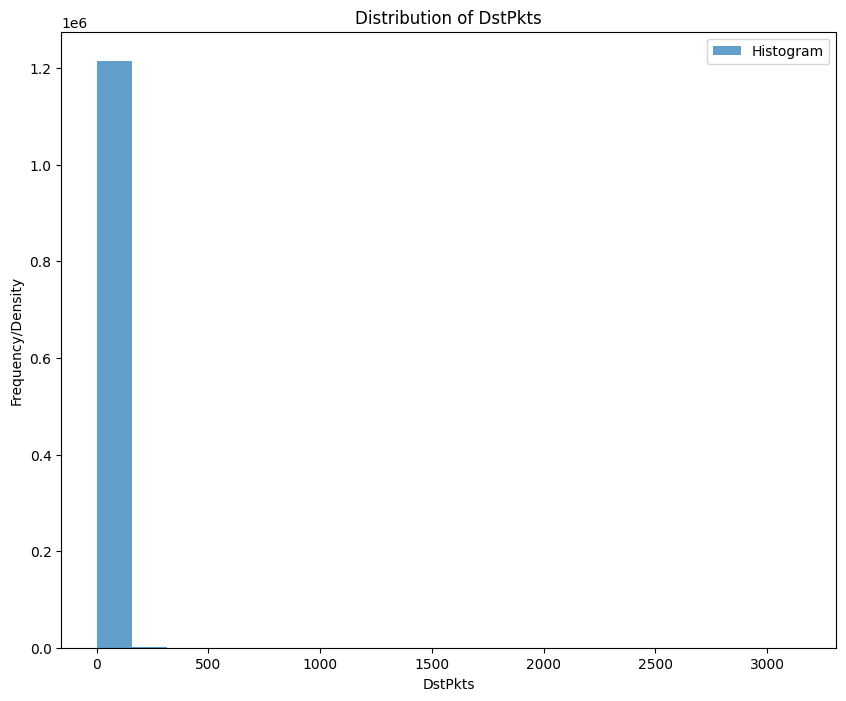

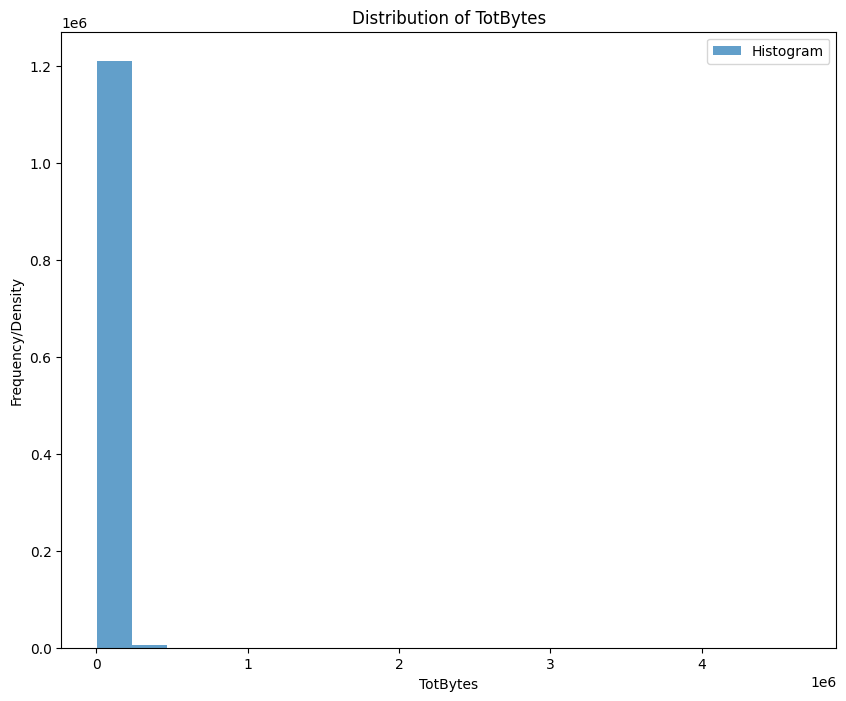

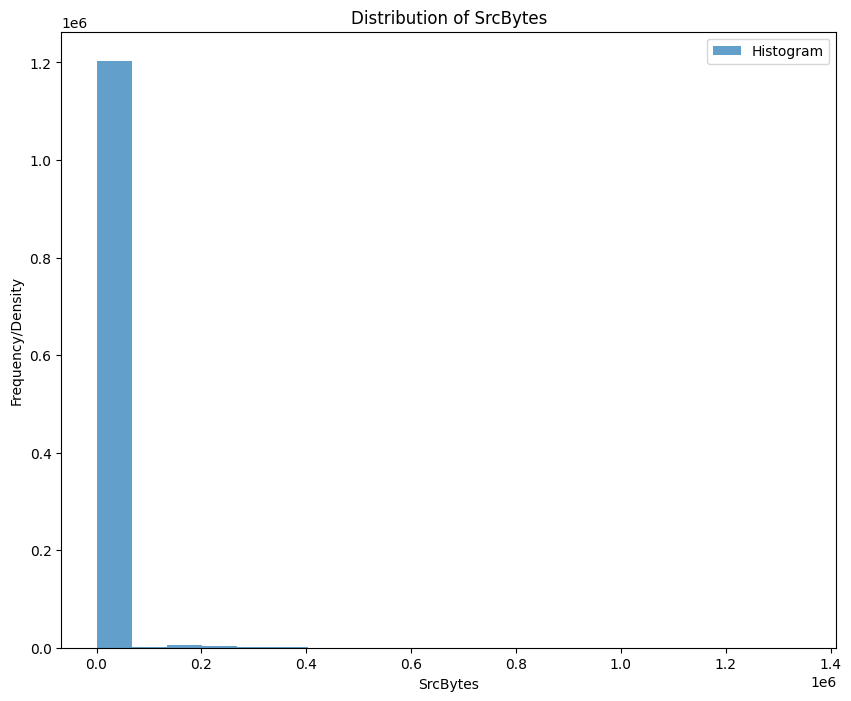

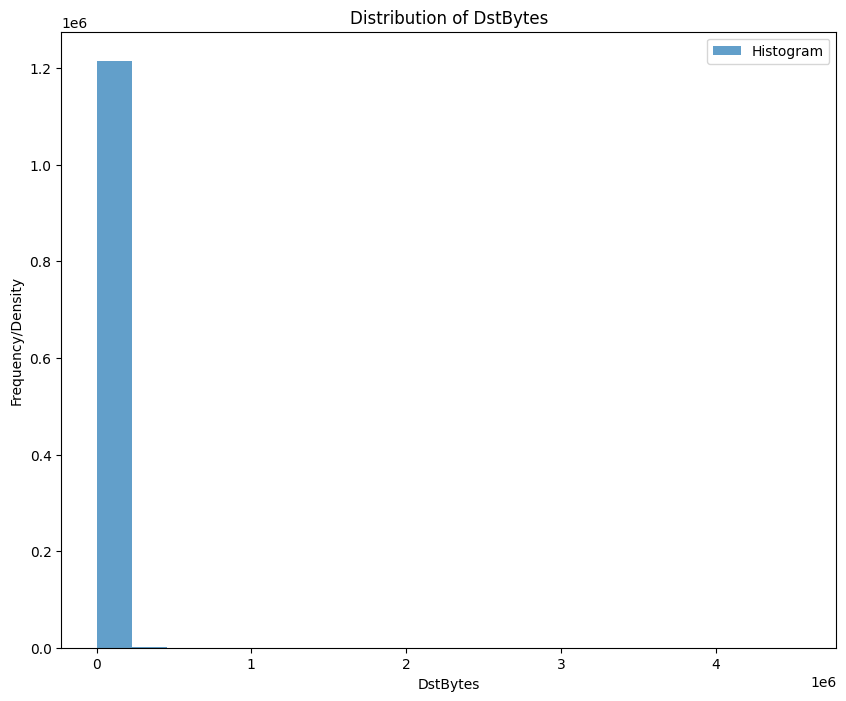

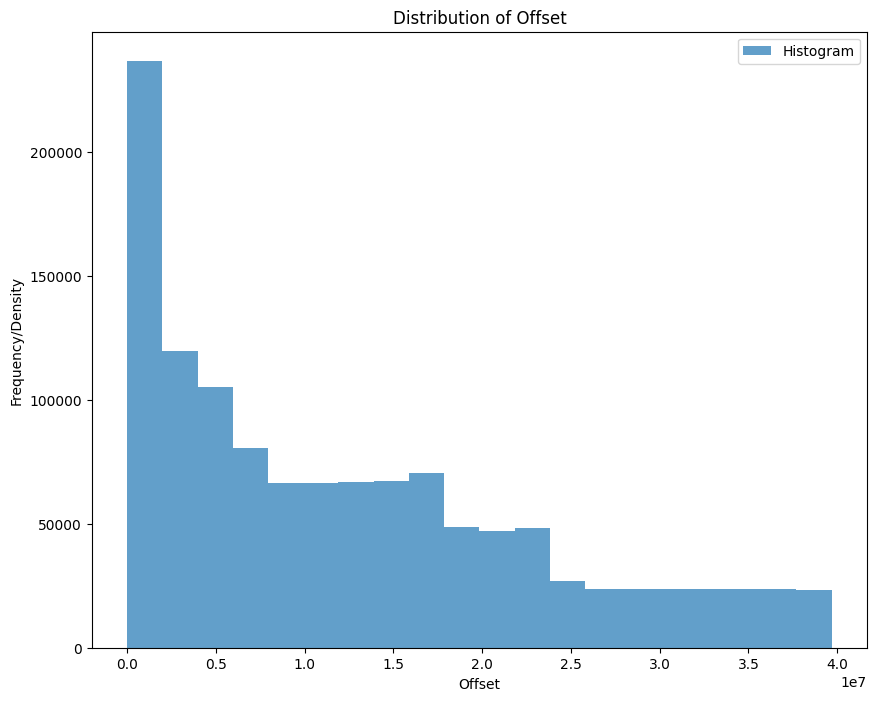

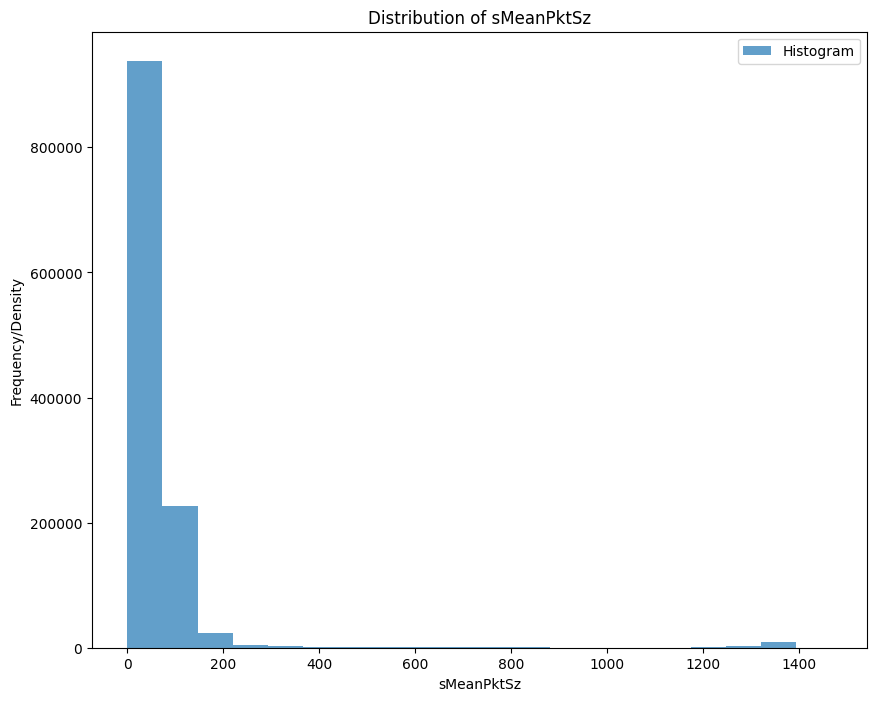

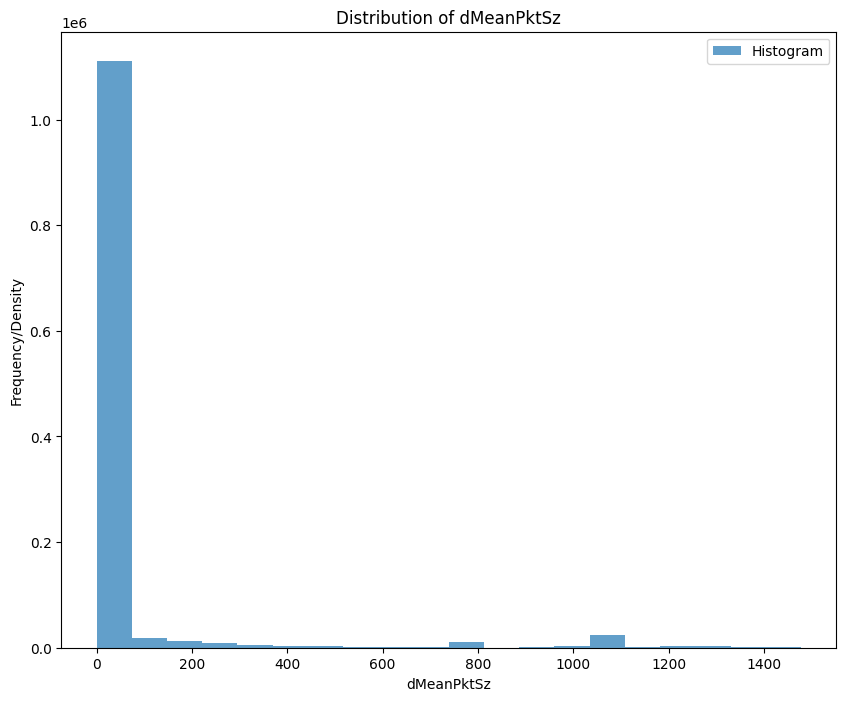

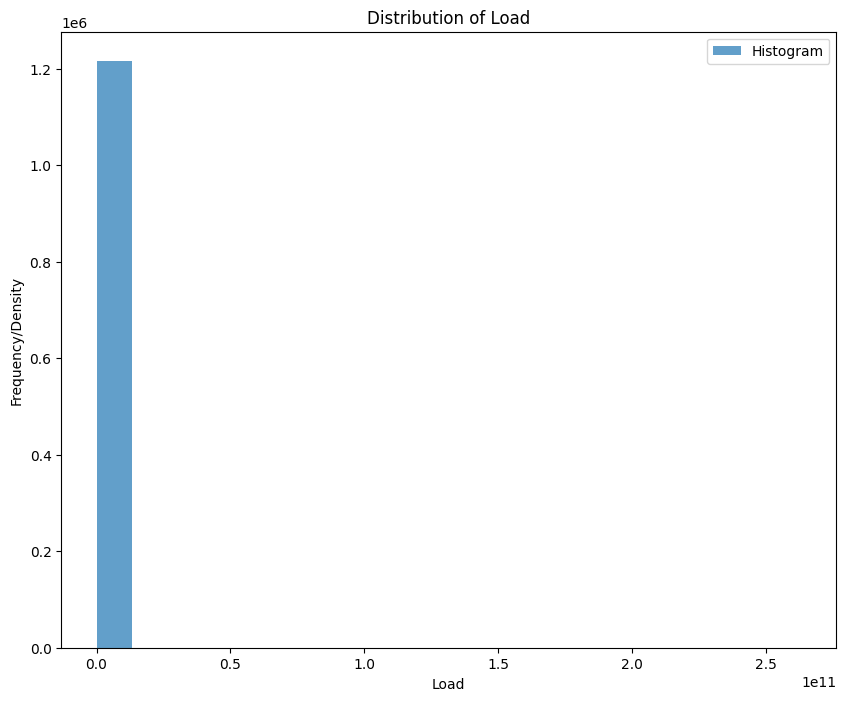

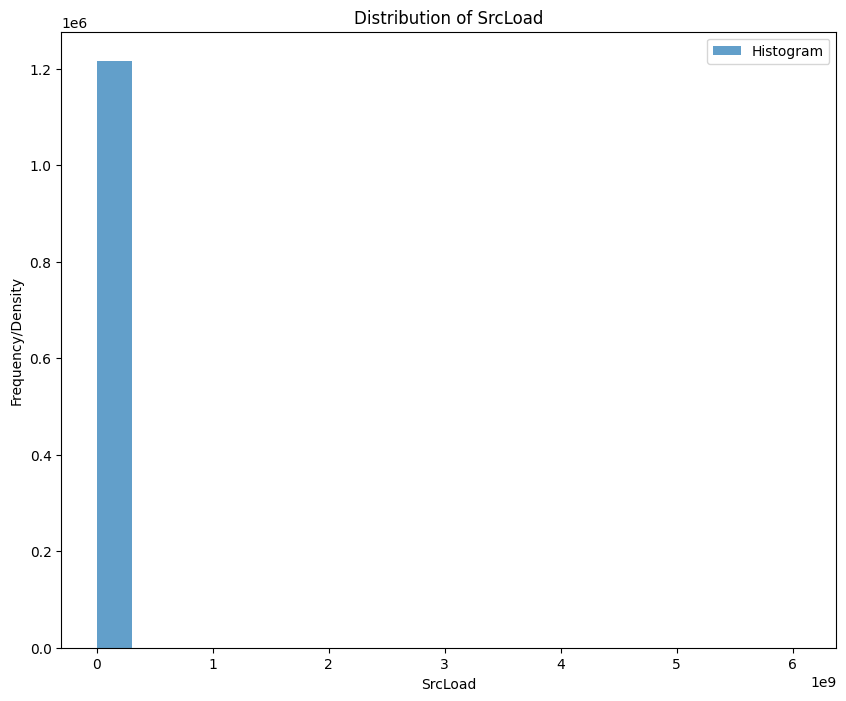

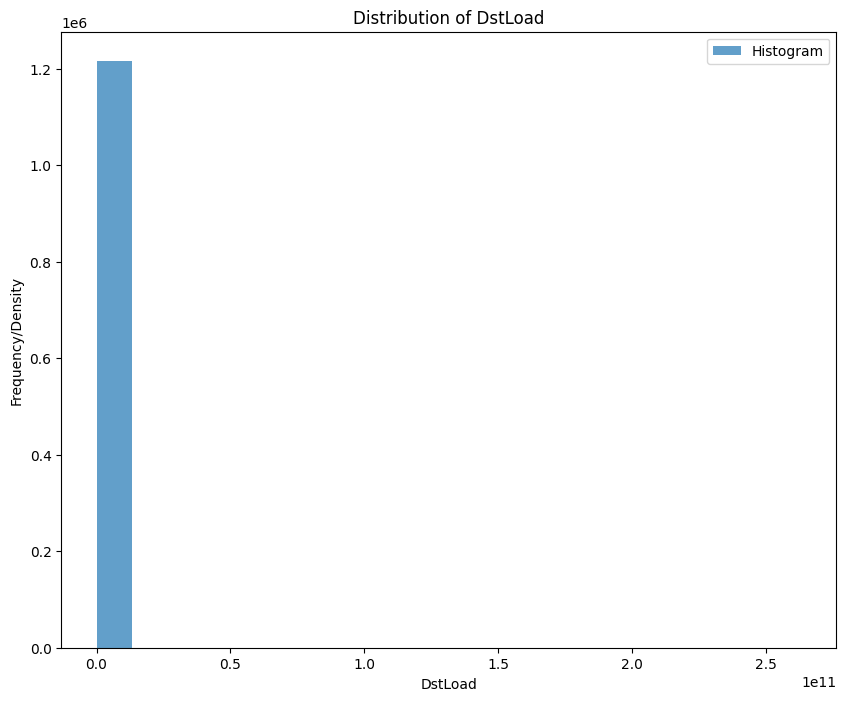

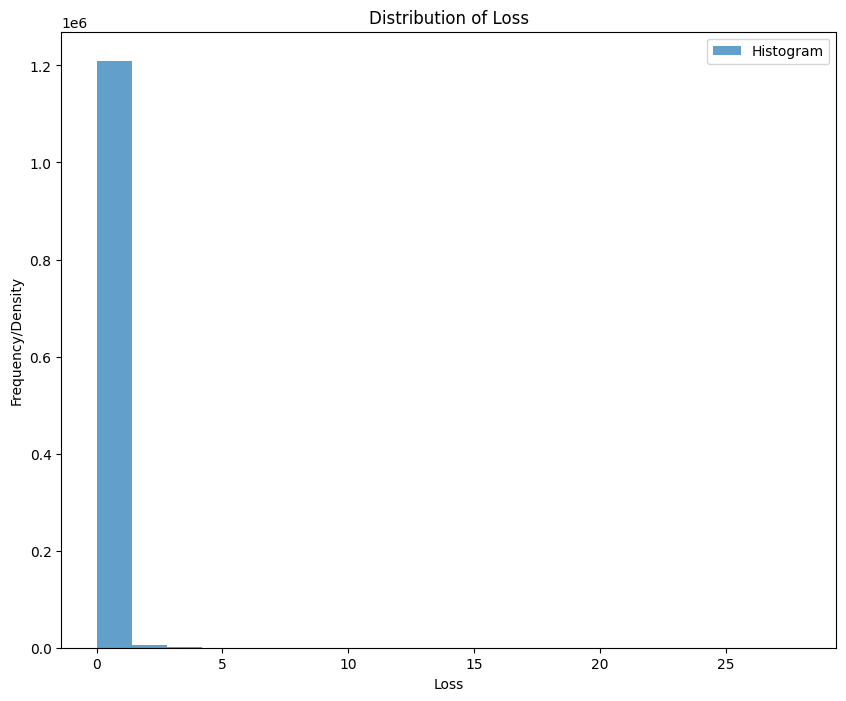

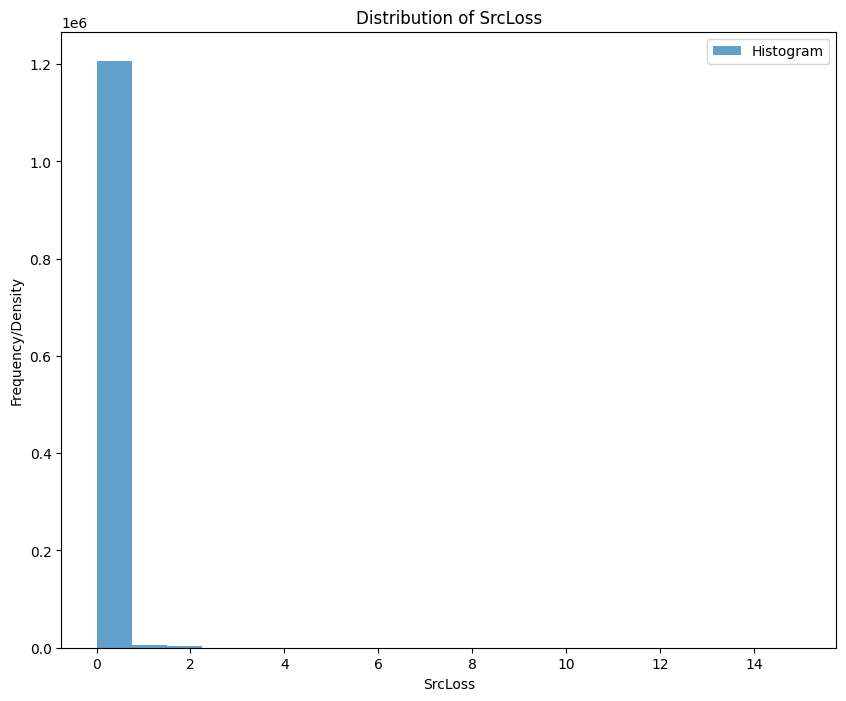

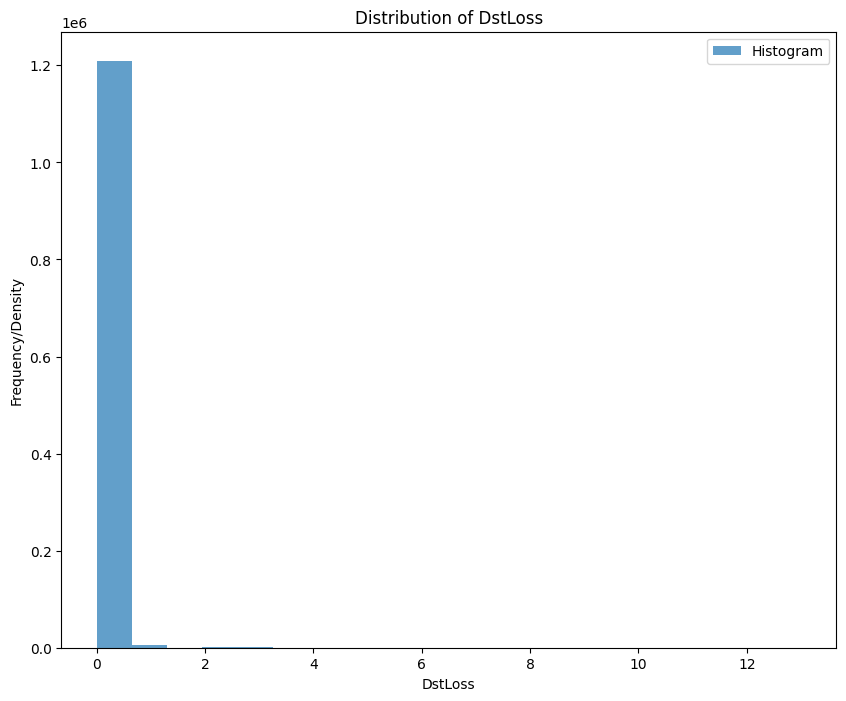

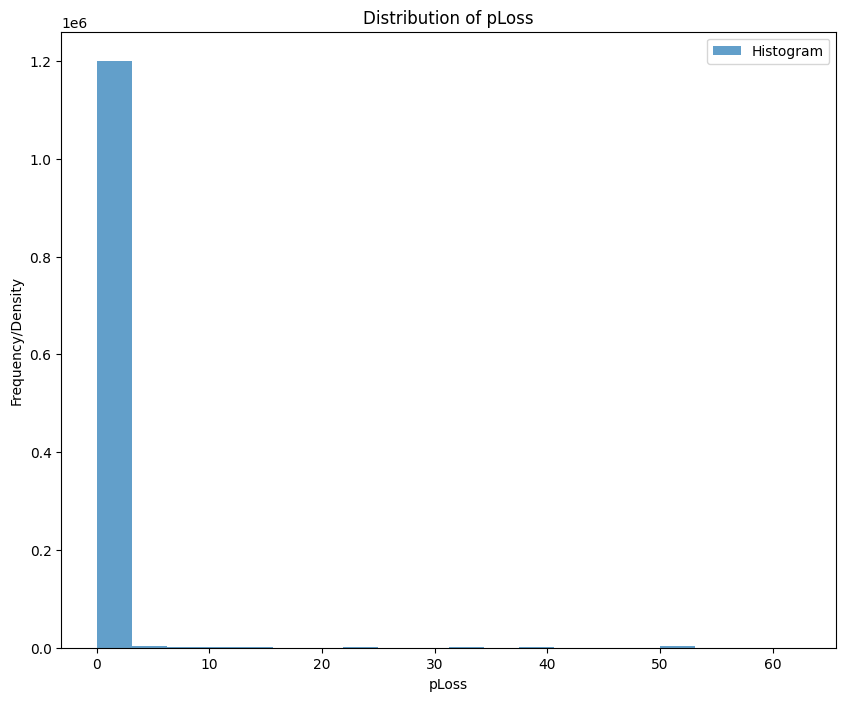

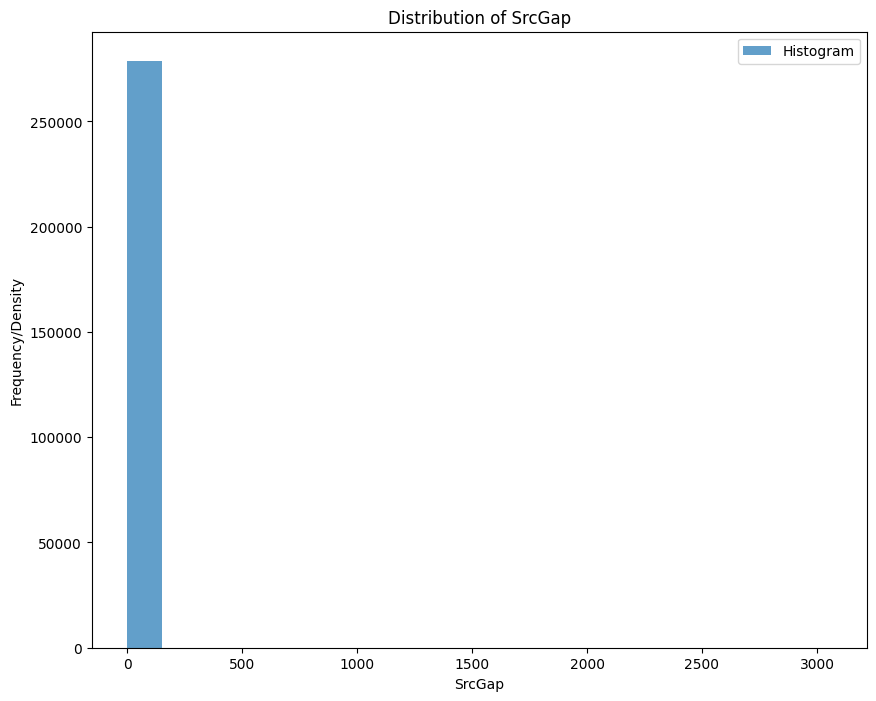

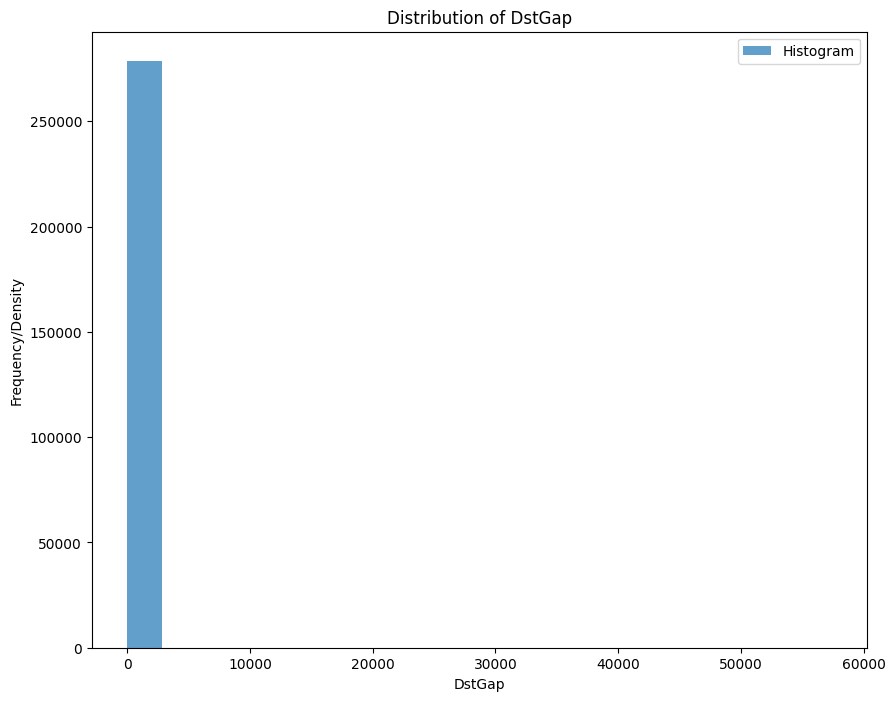

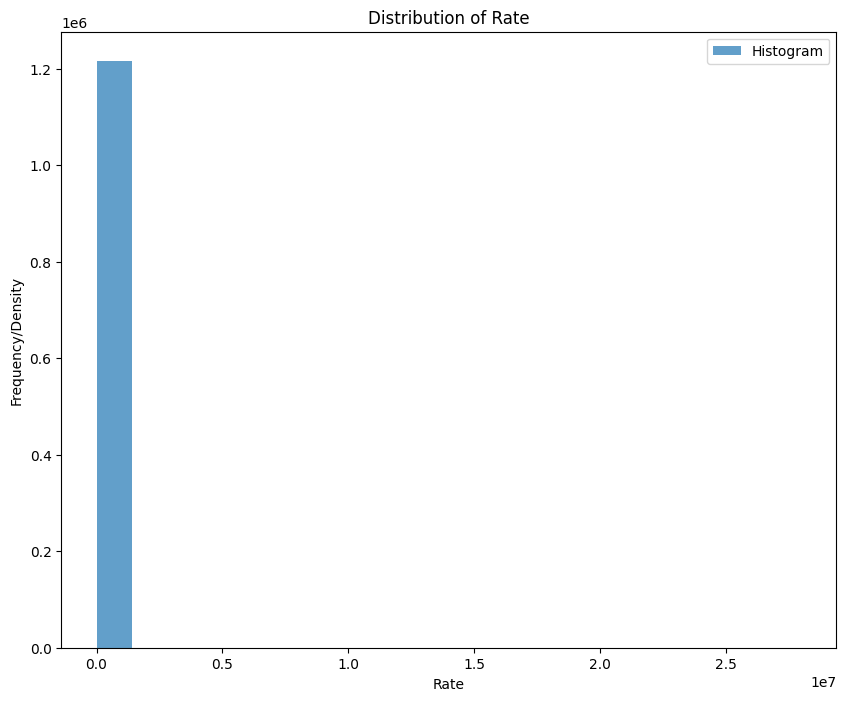

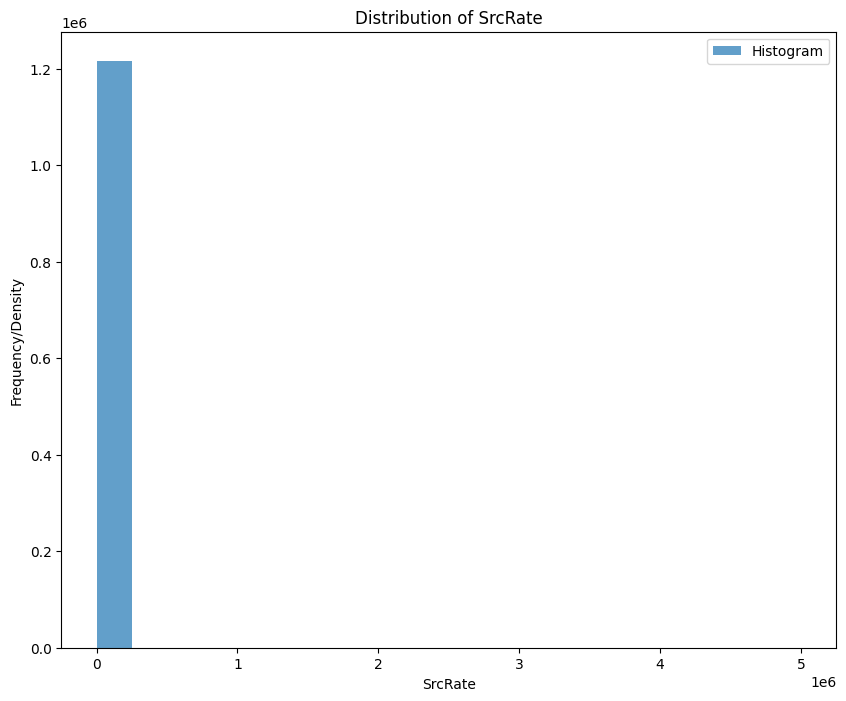

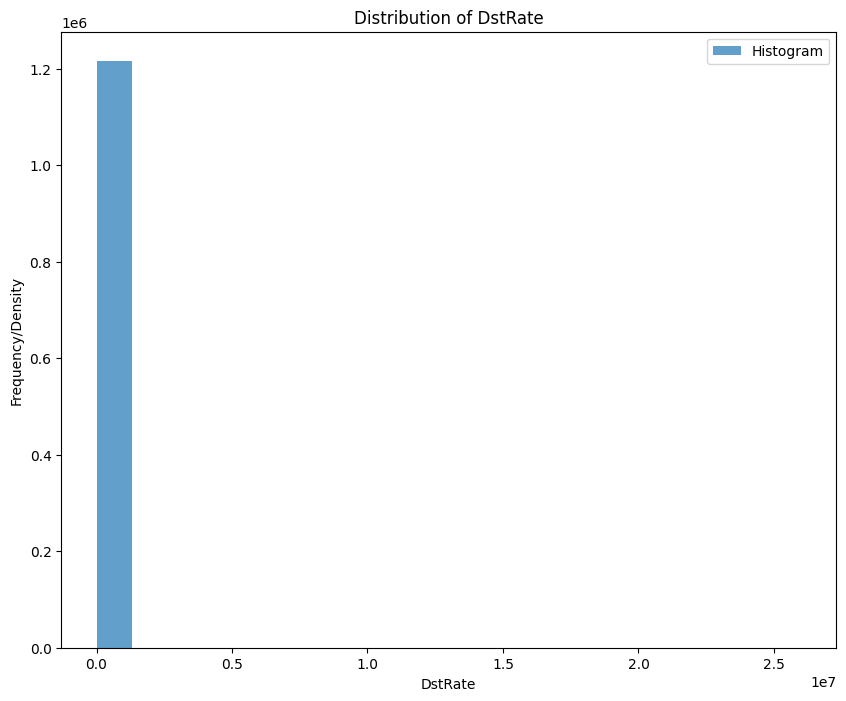

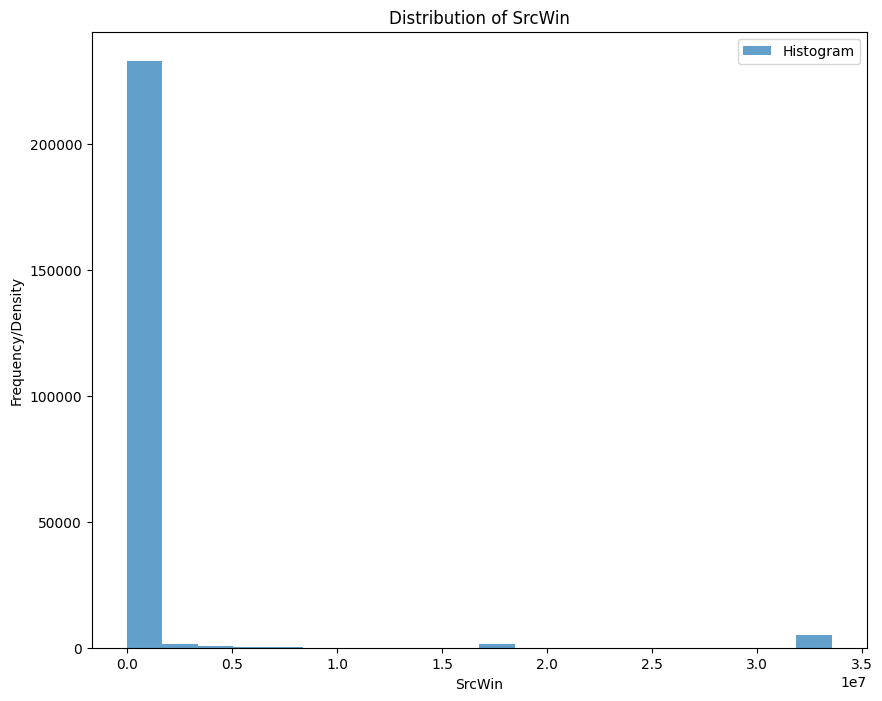

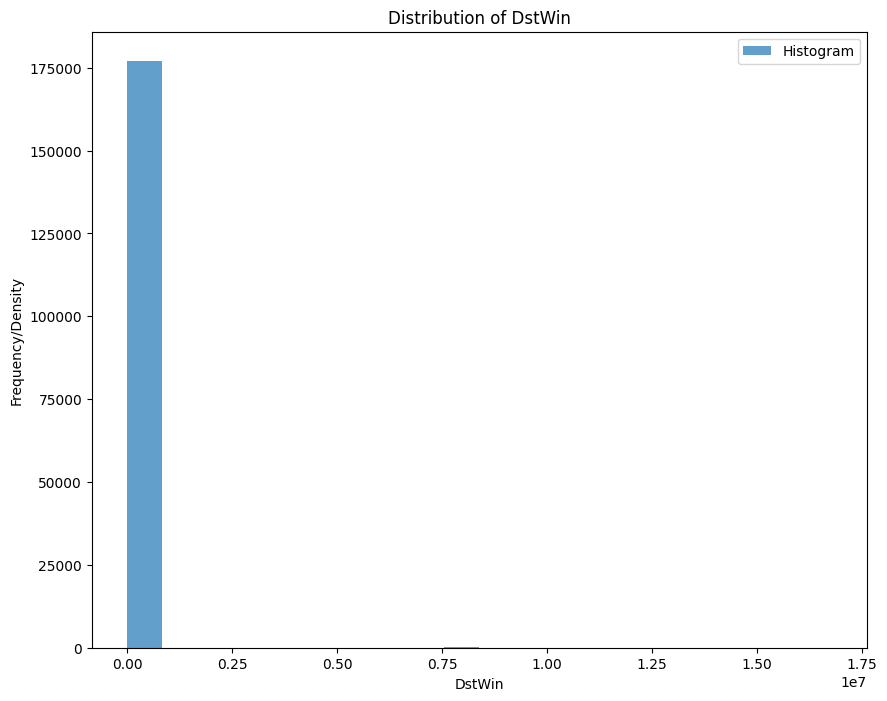

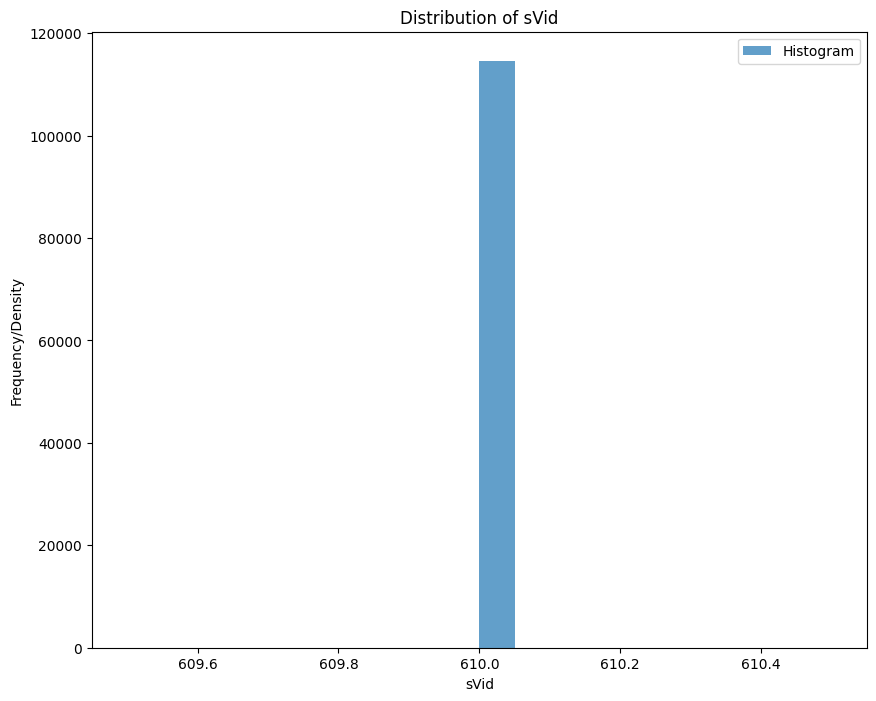

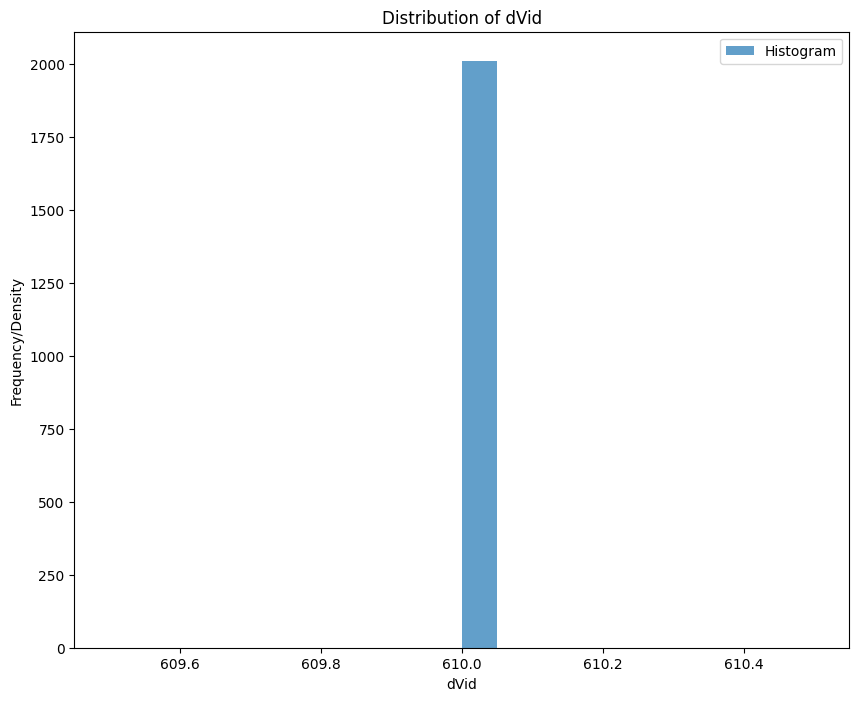

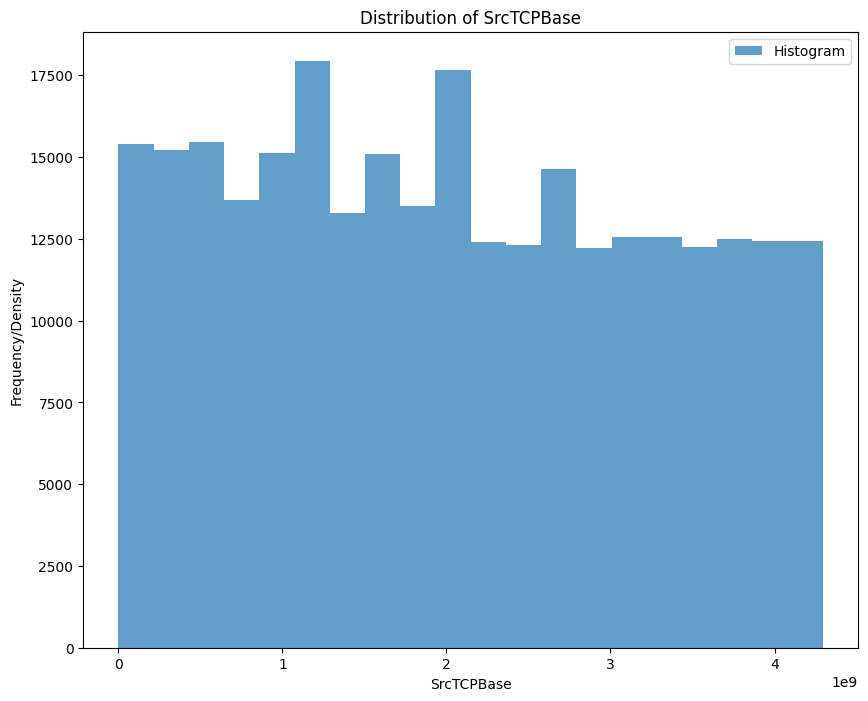

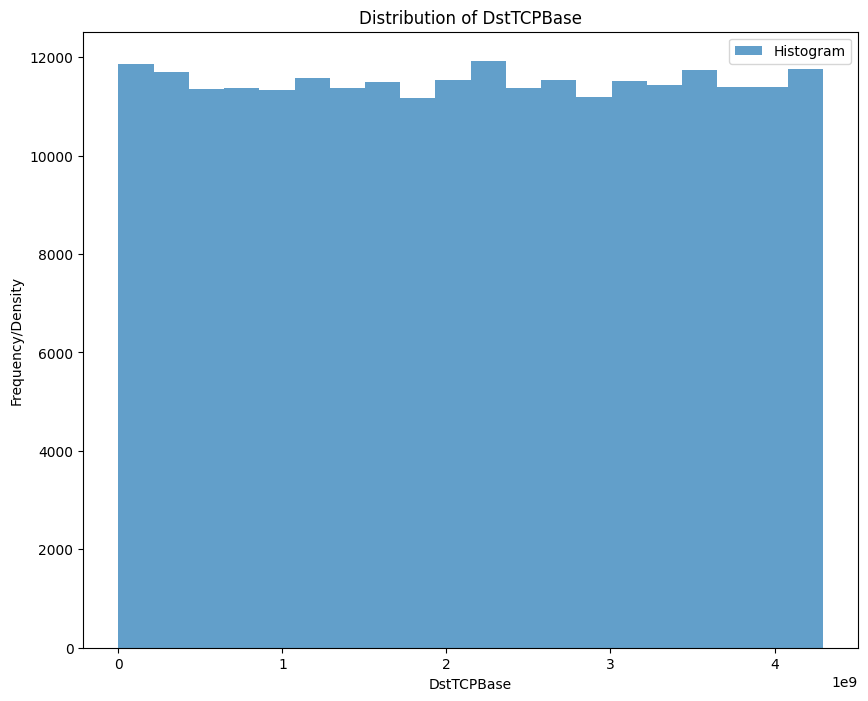

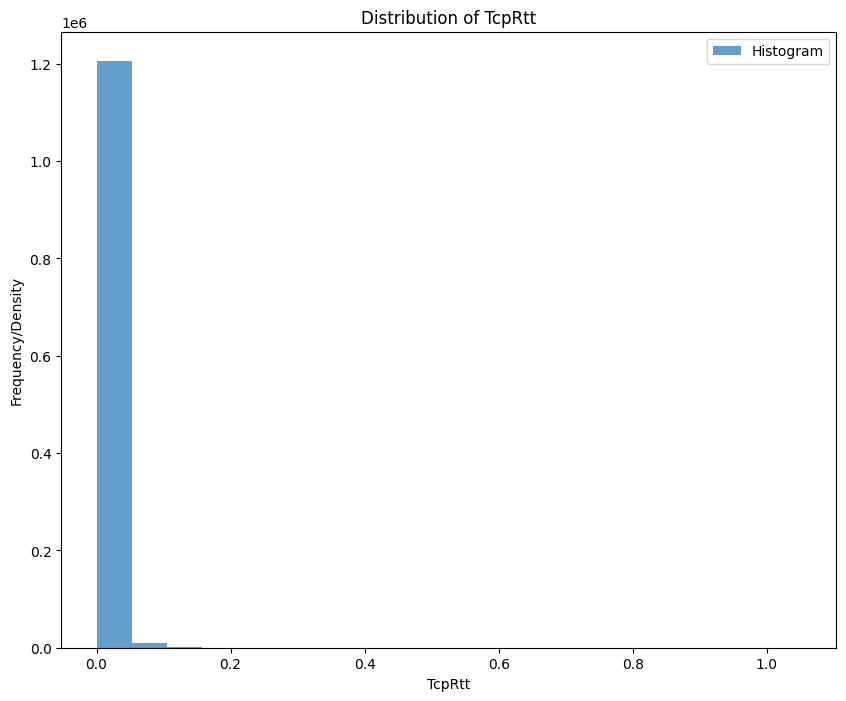

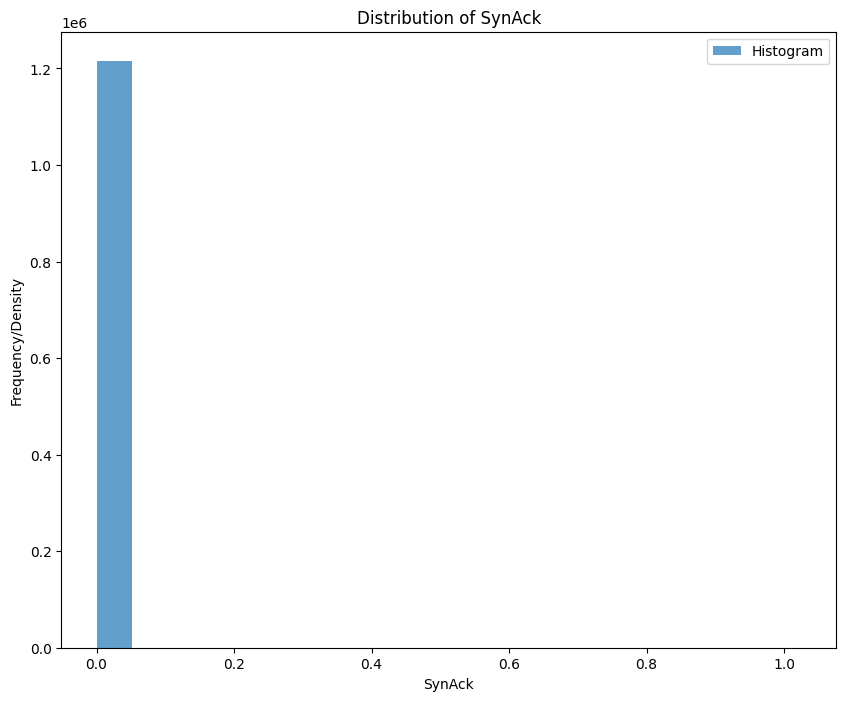

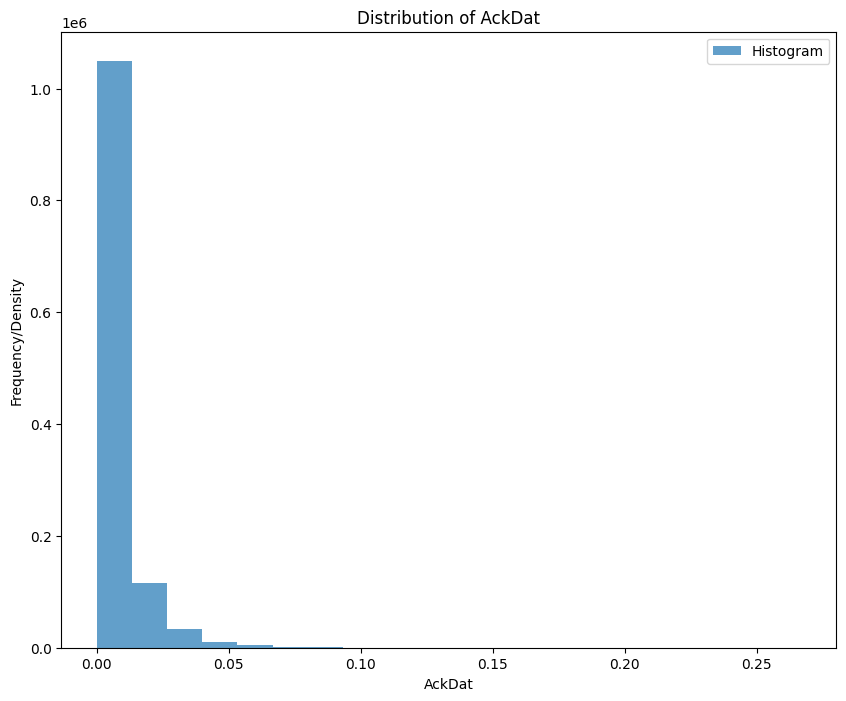

In [26]:

# Visualize distributions
for feature in continuous_features:
    plt.figure(figsize=(10, 8))

    # Plot histogram and density plot
    plt.hist(combinedDf[feature].values, bins=20, alpha=0.7, label="Histogram")

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel("Frequency/Density")
    plt.title(f"Distribution of {feature}")
    plt.legend()

    # Show the plot
    plt.show()

In [8]:
columnsWithMoreSingularValues = []

# Iterate through each column in the DataFrame
for column in combinedDf.columns:
    # Calculate the percentage of occurrences of the most frequent value
    dominant_value_percentage = combinedDf[column].value_counts(normalize=True).max() * 100

    # Check if the percentage exceeds 80%
    if dominant_value_percentage > 80:
        columnsWithMoreSingularValues.append(column)
        print(f" '{column}': dominant value occupying more than 80%.")

 'sTos': dominant value occupying more than 80%.
 'dTos': dominant value occupying more than 80%.
 'sDSb': dominant value occupying more than 80%.
 'dDSb': dominant value occupying more than 80%.
 'sTtl': dominant value occupying more than 80%.
 'dTtl': dominant value occupying more than 80%.
 'sHops': dominant value occupying more than 80%.
 'dHops': dominant value occupying more than 80%.
 'DstLoad': dominant value occupying more than 80%.
 'Loss': dominant value occupying more than 80%.
 'SrcLoss': dominant value occupying more than 80%.
 'DstLoss': dominant value occupying more than 80%.
 'pLoss': dominant value occupying more than 80%.
 'SrcGap': dominant value occupying more than 80%.
 'DstGap': dominant value occupying more than 80%.
 'DstRate': dominant value occupying more than 80%.
 'sVid': dominant value occupying more than 80%.
 'dVid': dominant value occupying more than 80%.
 'TcpRtt': dominant value occupying more than 80%.
 'SynAck': dominant value occupying more than 80

In [40]:
selected_features = []

for column in combinedDf.columns:
    if combinedDf[column].dtype in ['int64', 'float64']:
      # Perform one-way ANOVA
      f_statistic, p_value = f_oneway(*[group[column] for name, group in combinedDf.groupby('Label')])

      if p_value < 0.05:
          selected_features.append(column)

# Print selected features
print("Selected Features:")
print(len(selected_features))

Selected Features:
21


In [29]:
remaining_features = [featureName for featureName in selected_features if featureName not in columnsWithMoreSingularValues]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
combinedDf[remaining_features] = scaler.fit_transform(combinedDf[remaining_features])

In [30]:
remaining_features.append('Label')
remaining_features.append('Attack Type')
remaining_features.append('Attack Tool')
print(remaining_features)
print(len(remaining_features))

['Unnamed: 0', 'Seq', 'Dur', 'RunTime', 'Mean', 'Sum', 'Min', 'Max', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Load', 'SrcLoad', 'Rate', 'SrcRate', 'Label', 'Attack Type', 'Attack Tool']
24


In [31]:
# These columns are selected based on the ANOVA F scores and the null values and Removing columns which has dominant singular values and the understanding of the features computed for binary and multi level classification

combinedDf = combinedDf[remaining_features]

In [33]:
columns_null = []
columns = combinedDf.columns
for column in columns:
    c = combinedDf[column].isnull().sum()
    if c != 0:
        print(column, 'has {} null values'.format(c))
        columns_null.append(column)

In [48]:
file_path_drive = '/content/drive/My Drive/updated_Combined.csv'


# Write DataFrame to a CSV file
combinedDf.to_csv(file_path_drive, index=False)


In [36]:
# Define a threshold for high cardinality (e.g., 10 unique values)
high_cardinality_threshold = 100000

# Calculate the number of unique values in each column
n_unique_values = combinedDf.nunique()

# Identify columns with high cardinality
high_cardinality_columns = n_unique_values[n_unique_values > high_cardinality_threshold].index

# Print the high cardinality columns
print("Columns with high cardinality (>", high_cardinality_threshold, "unique values):")
print(high_cardinality_columns.tolist())

Columns with high cardinality (> 100000 unique values):
['Unnamed: 0', 'Seq', 'Dur', 'RunTime', 'Mean', 'Sum', 'Min', 'Max', 'Offset', 'Load', 'SrcLoad', 'Rate', 'SrcRate']


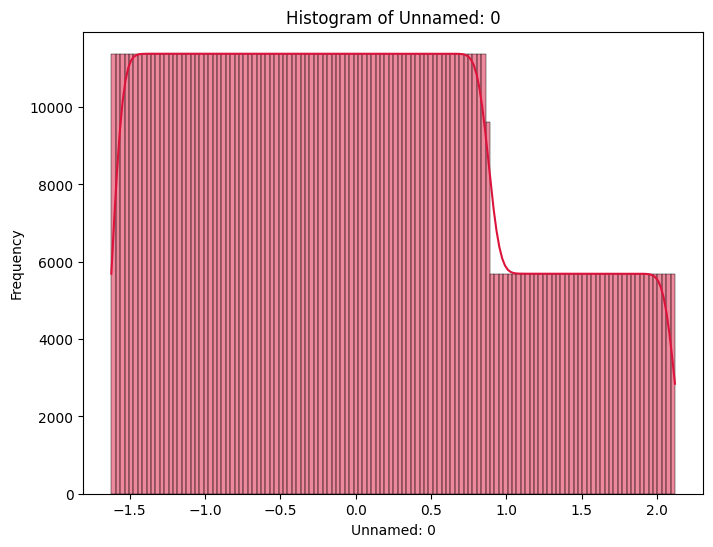

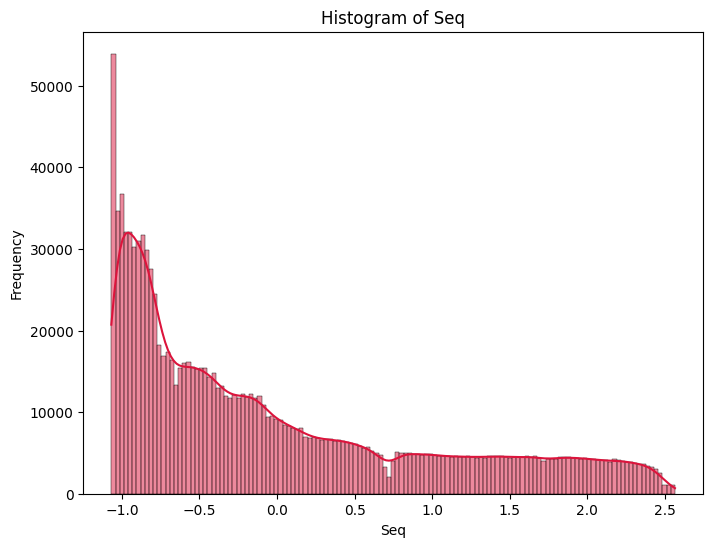

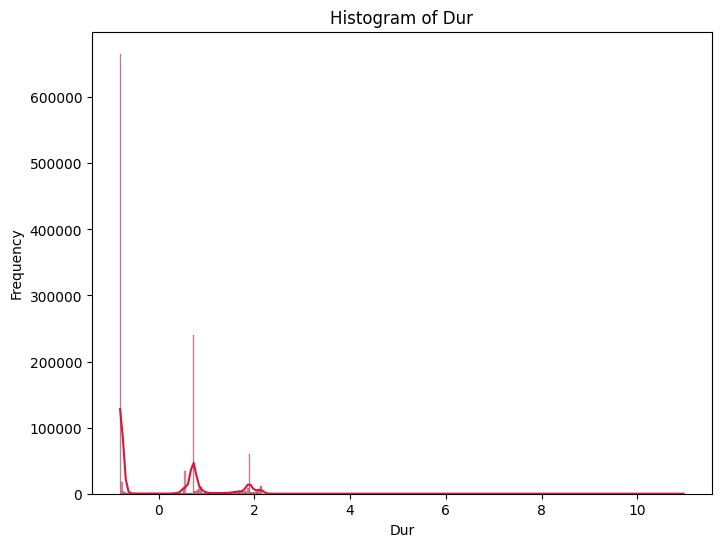

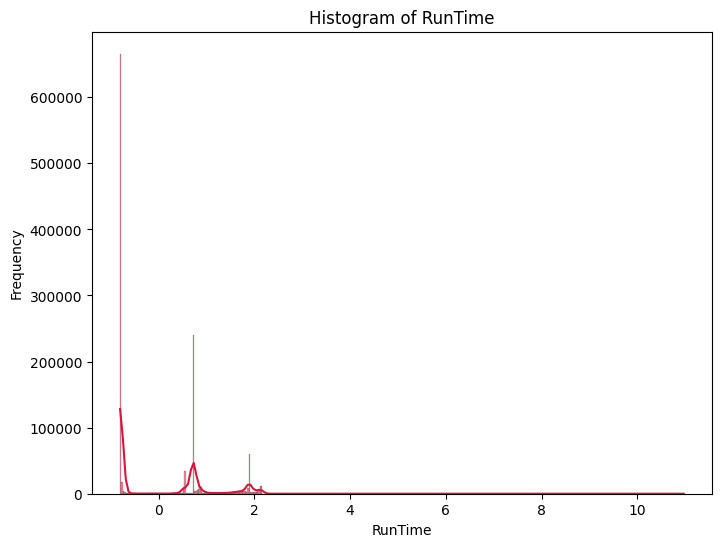

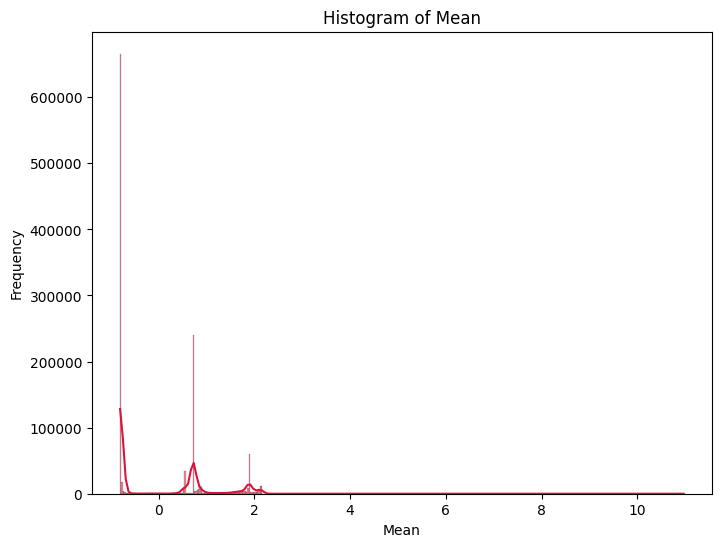

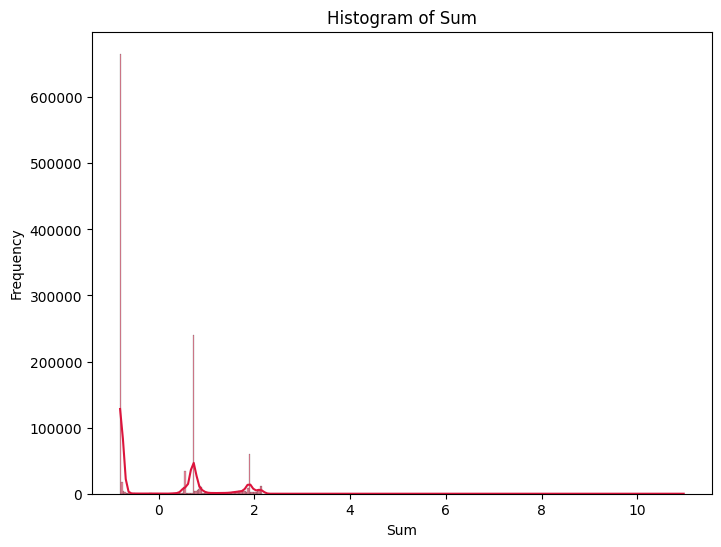

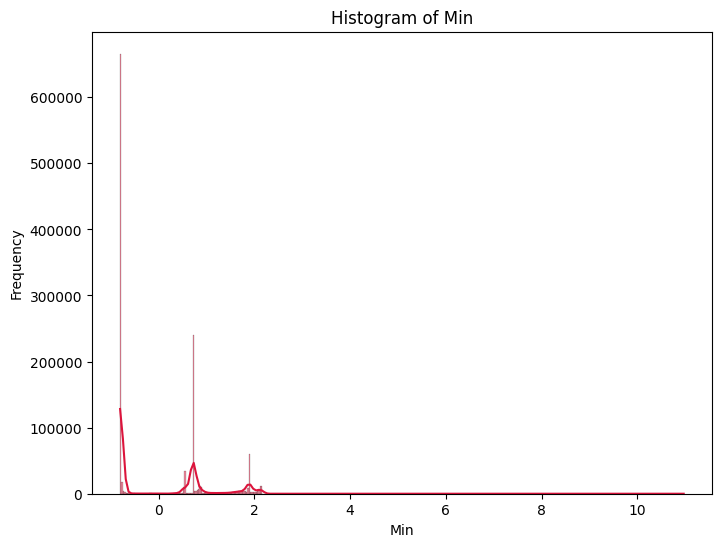

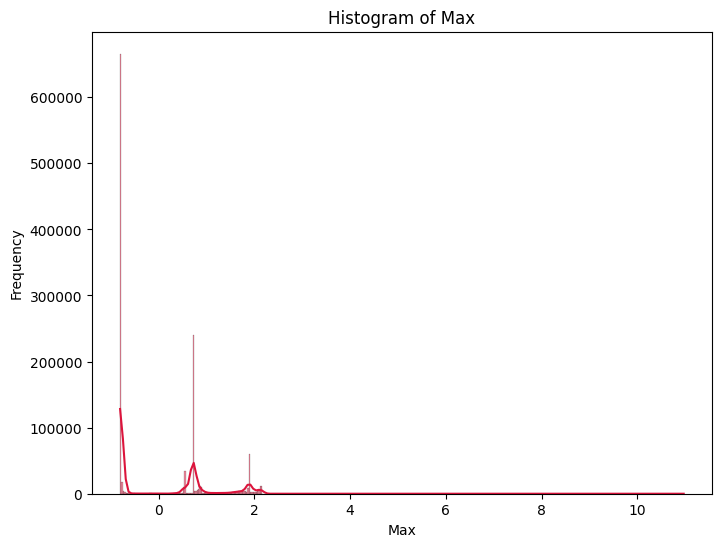

KeyboardInterrupt: 

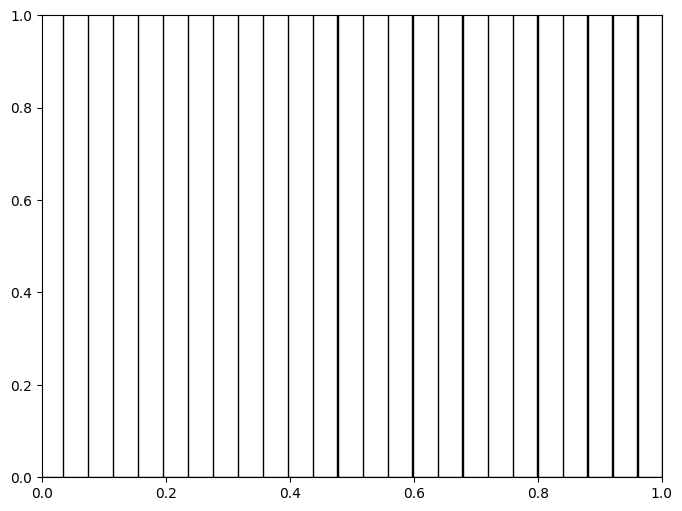

In [42]:
# Histogram and Density Plot for a single numerical feature

numerical_features = combinedDf.select_dtypes(include=['float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(combinedDf[feature], kde=True, color='crimson')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-49-e86a2e3f6e0a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combinedDf, x=feature, palette='Set2')


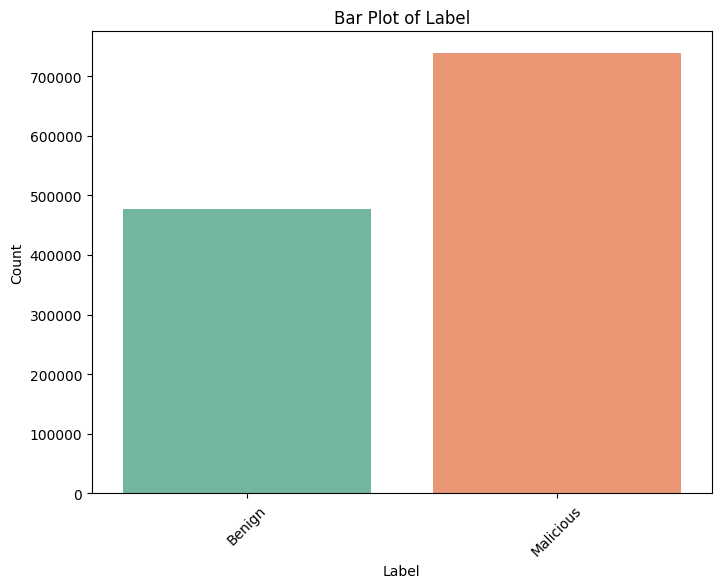

<ipython-input-49-e86a2e3f6e0a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combinedDf, x=feature, palette='Set2')


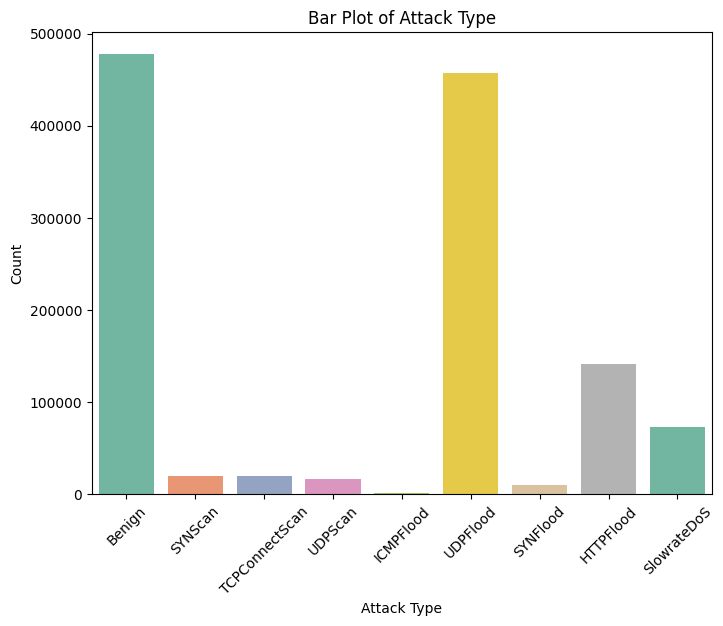

<ipython-input-49-e86a2e3f6e0a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combinedDf, x=feature, palette='Set2')


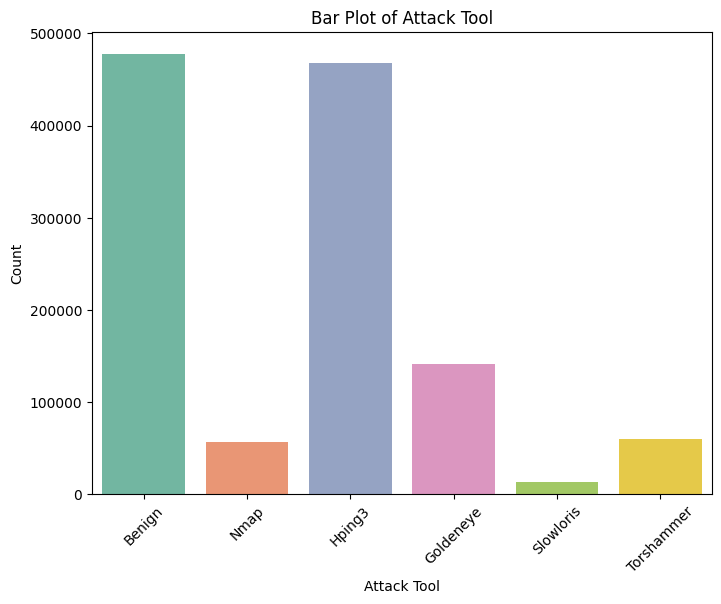

<ipython-input-49-e86a2e3f6e0a>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combinedDf.corr(), annot=True, cmap='coolwarm')


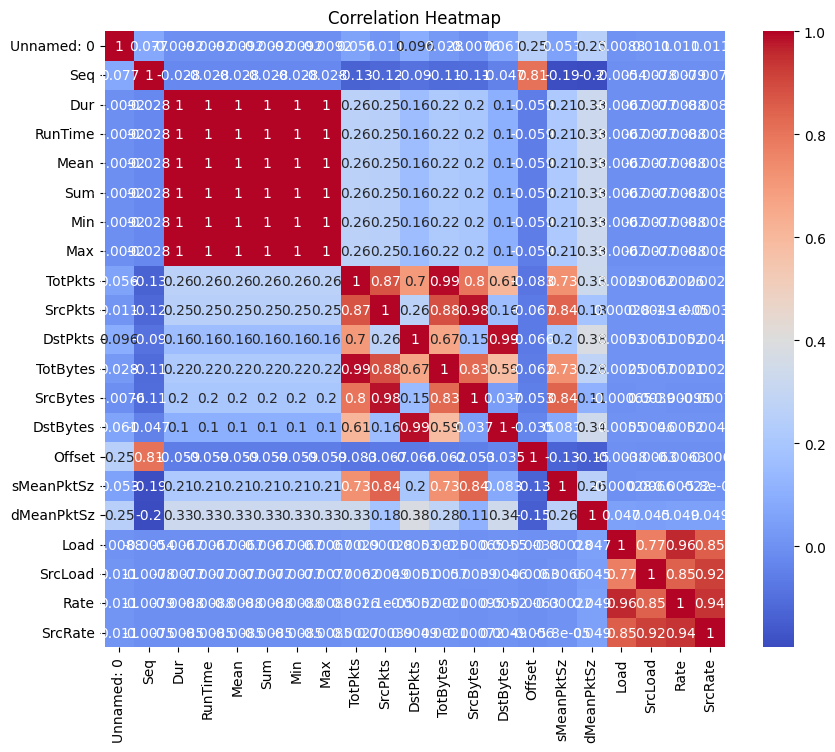

In [49]:
# Bar Plots for categorical features
categorical_features = combinedDf.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=combinedDf, x=feature, palette='Set2')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(combinedDf.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Pairwise Scatter Plots for numerical features
sns.pairplot(combinedDf[numerical_features])
plt.show()

<ipython-input-50-1c2797c7ac9b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combinedDf.corr(), annot=True, cmap='coolwarm')


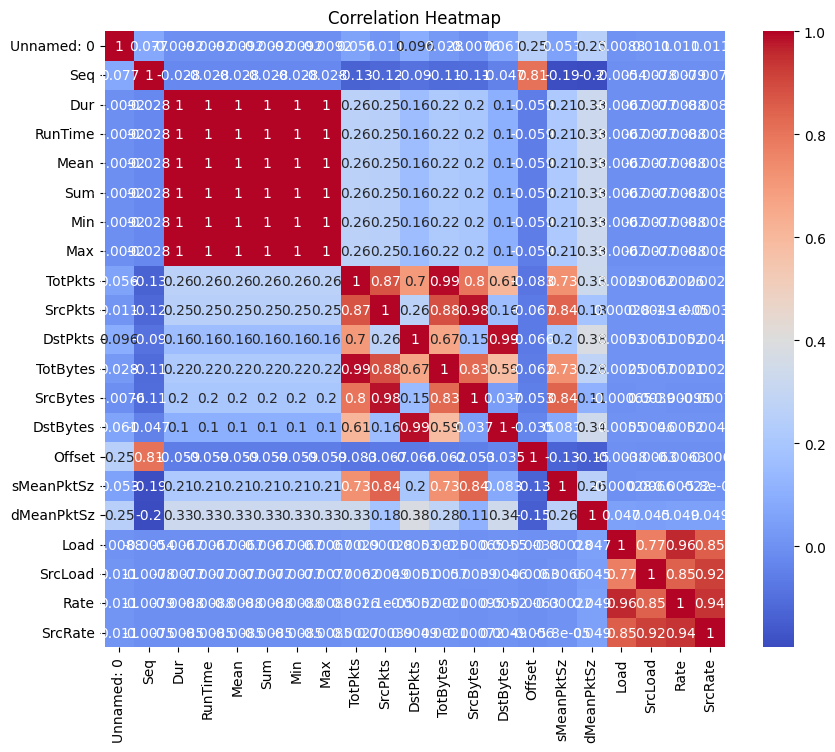

In [50]:
# Correlation Heatmap
numerical_features= combinedDf.select_dtypes(include=['int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(combinedDf.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [39]:
# Step 3: Feature Relationships
# Feature Correlation
correlation_matrix = combinedDf.corr()
print(correlation_matrix)

<ipython-input-39-f82b59fde73a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combinedDf.corr()


            Unnamed: 0       Seq       Dur   RunTime      Mean       Sum  \
Unnamed: 0    1.000000  0.076733 -0.009216 -0.009216 -0.009216 -0.009216   
Seq           0.076733  1.000000 -0.028287 -0.028287 -0.028287 -0.028287   
Dur          -0.009216 -0.028287  1.000000  1.000000  1.000000  1.000000   
RunTime      -0.009216 -0.028287  1.000000  1.000000  1.000000  1.000000   
Mean         -0.009216 -0.028287  1.000000  1.000000  1.000000  1.000000   
Sum          -0.009216 -0.028287  1.000000  1.000000  1.000000  1.000000   
Min          -0.009216 -0.028287  1.000000  1.000000  1.000000  1.000000   
Max          -0.009216 -0.028287  1.000000  1.000000  1.000000  1.000000   
TotPkts       0.055899 -0.134597  0.264653  0.264653  0.264653  0.264653   
SrcPkts       0.010648 -0.120263  0.249964  0.249964  0.249964  0.249964   
DstPkts       0.095570 -0.090360  0.157738  0.157738  0.157738  0.157738   
TotBytes      0.027733 -0.112119  0.217369  0.217369  0.217369  0.217369   
SrcBytes    